# FIFA 2019 Soccer Player Analysis:

## Predicting Optimal Position Based On Player Statistics

## By Andrew Hulett and Dominik Tajak

### Data Set: https://www.kaggle.com/karangadiya/fifa19


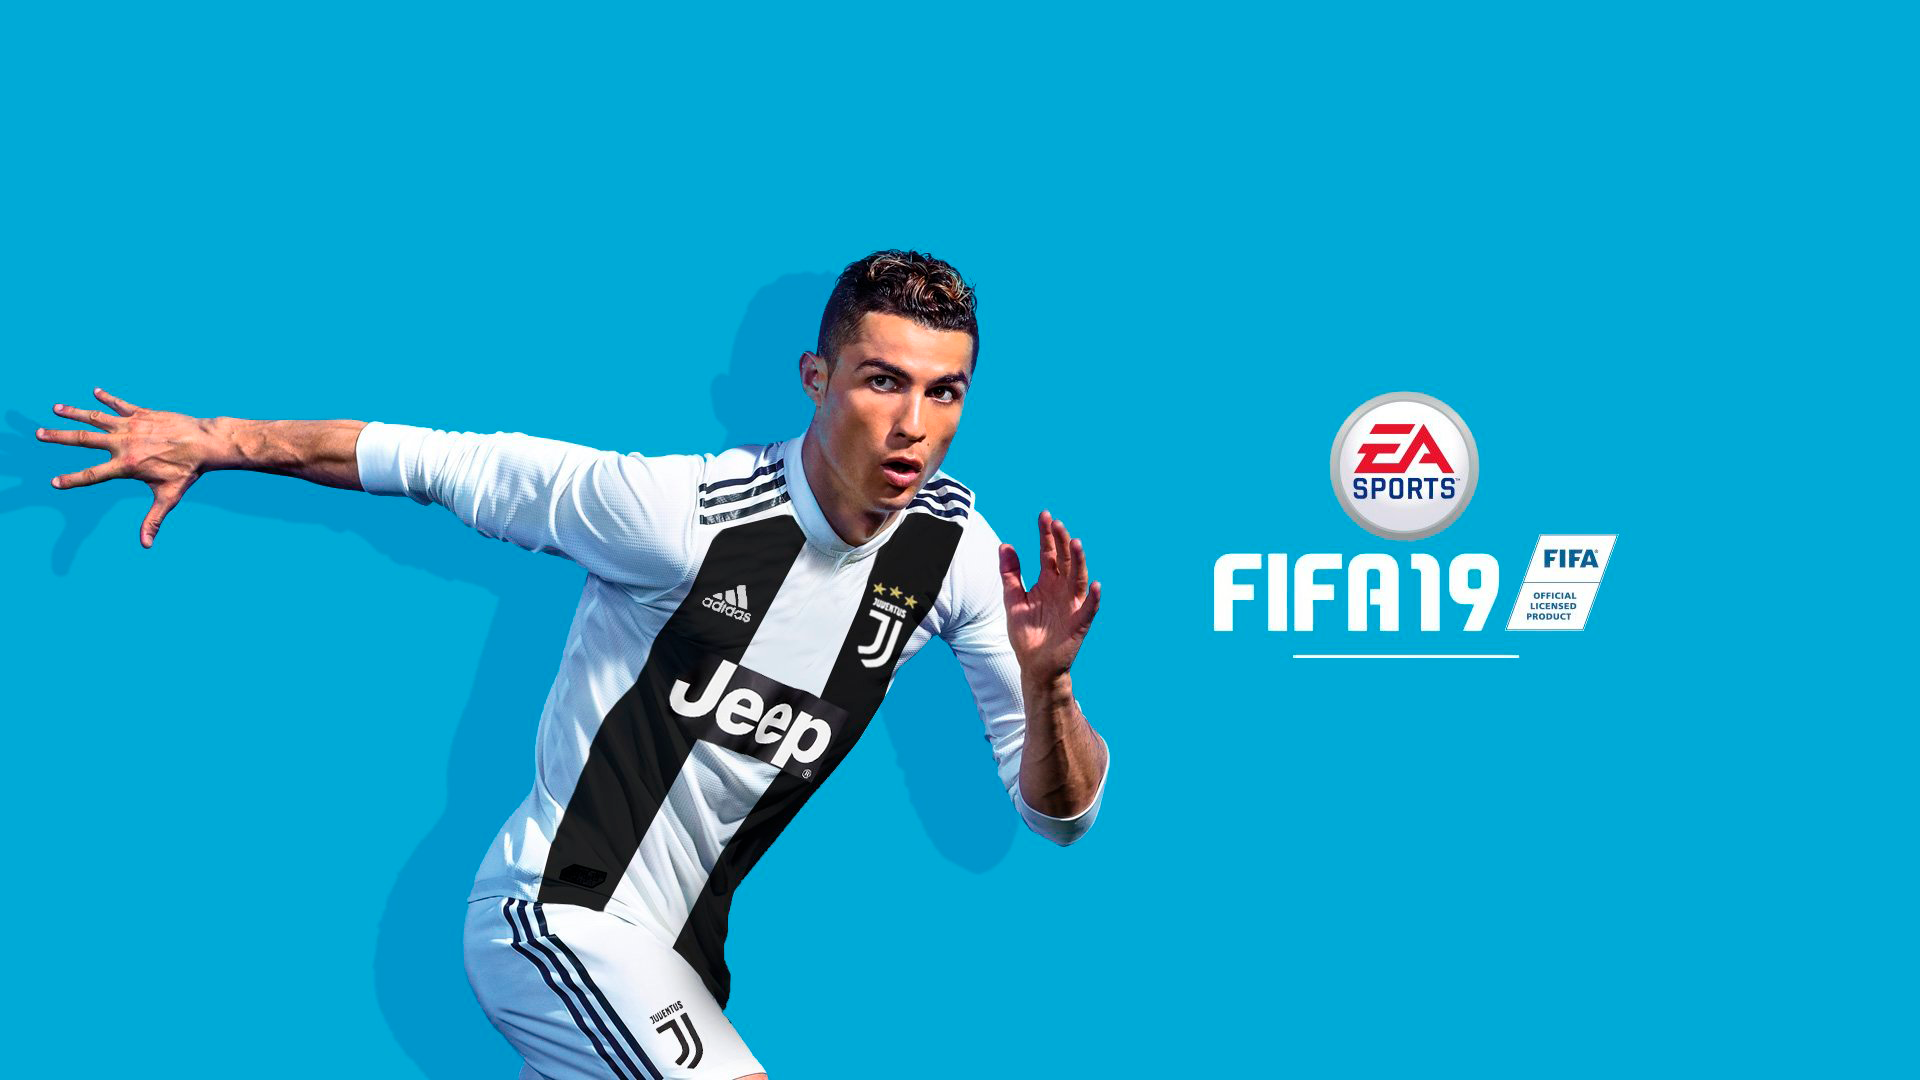

# Preprocessing

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [7]:
data = pd.read_csv('fifaCleanedExcel.csv')
UndefinedPlayers = pd.read_csv('UndefinedPlayers.csv')
data.head()

,ID,Name,Age,Overall,Potential,Value in K€,Wage in K€,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,94,94,110500,565,5,4,4,...,75,96,33,28,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,33,94,94,77000,405,5,4,5,...,85,95,28,31,23,7,11,15,14,11
2,190871,Neymar Jr,26,92,93,118500,290,5,5,5,...,81,94,27,24,33,9,9,15,15,11
3,193080,De Gea,27,91,93,72000,260,4,3,1,...,40,68,15,21,13,90,85,87,88,94
4,192985,K. De Bruyne,27,91,92,102000,355,4,5,4,...,79,88,68,58,51,15,13,5,10,13


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 50 columns):
ID                          18147 non-null int64
Name                        18147 non-null object
Age                         18147 non-null int64
Overall                     18147 non-null int64
Potential                   18147 non-null int64
Value in K€                 18147 non-null int64
Wage in K€                  18147 non-null int64
International Reputation    18147 non-null int64
Weak Foot                   18147 non-null int64
Skill Moves                 18147 non-null int64
Work Rate                   18147 non-null object
Position                    18147 non-null object
General Position            18147 non-null object
Jersey Number               18147 non-null int64
Height in cm                18147 non-null int64
Weight in lbs               18147 non-null int64
Crossing                    18147 non-null int64
Finishing                   18147 non-null int64
Headi

## Illustration of object datatype features

In [9]:
data.describe(include=['O'])

,Name,Work Rate,Position,General Position
count,18147,18147,18147,18147
unique,17140,9,27,4
top,J. Rodríguez,Medium/ Medium,ST,M
freq,11,9804,2152,7589


## Creating a sublist of all integer type features

In [10]:
int_values=[]
for i in data.columns:
    if(i == 'Name' or i == 'Position' or i == 'General Position' or i == 'Work Rate'):
        continue
    int_values.append(i)
print(int_values)

['ID', 'Age', 'Overall', 'Potential', 'Value in K€', 'Wage in K€', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Height in cm', 'Weight in lbs', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


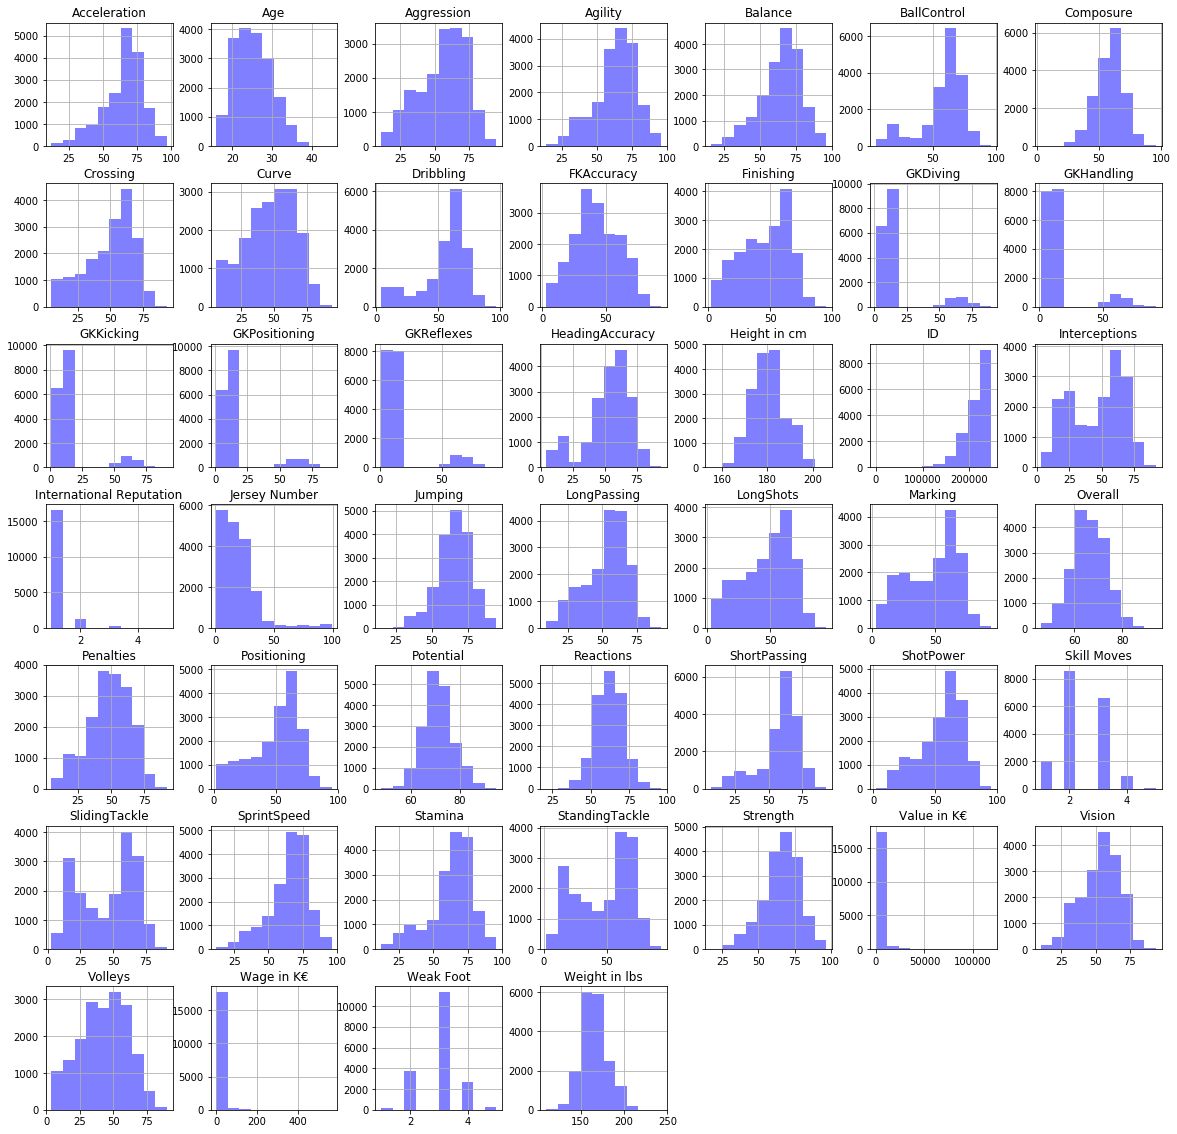

In [40]:
data.hist(figsize=(20,20), facecolor='blue', alpha=0.5)
plt.show()

## Feature Scaling

In [11]:
featuresTobeScaled = ['Value in K€','Wage in K€']
scaler = StandardScaler().fit(data[featuresTobeScaled])
data_numerical = scaler.transform(data[featuresTobeScaled])
data.loc[:, featuresTobeScaled] = data_numerical
data.head()

,ID,Name,Age,Overall,Potential,Value in K€,Wage in K€,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,94,94,19.291201,25.204265,5,4,4,...,75,96,33,28,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,33,94,94,13.311911,17.941324,5,4,5,...,85,95,28,31,23,7,11,15,14,11
2,190871,Neymar Jr,26,92,93,20.719091,12.721085,5,5,5,...,81,94,27,24,33,9,9,15,15,11
3,193080,De Gea,27,91,93,12.419480,11.359284,4,3,1,...,40,68,15,21,13,90,85,87,88,94
4,192985,K. De Bruyne,27,91,92,17.774068,15.671655,4,5,4,...,79,88,68,58,51,15,13,5,10,13


  General Position             ID
3                M  216122.721834
0                A  214695.716910
1                D  213916.696727
2                G  207877.391111


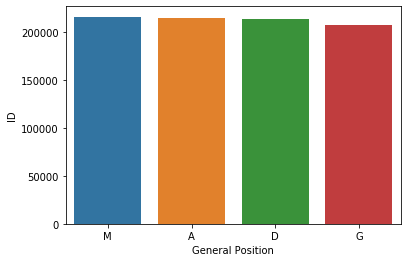

  General Position        Age
2                G  26.043457
1                D  25.474088
0                A  24.980127
3                M  24.651733


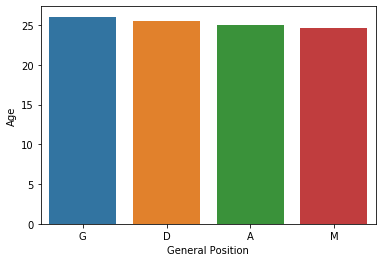

  General Position    Overall
3                M  66.568059
1                D  66.400102
0                A  66.291714
2                G  64.603457


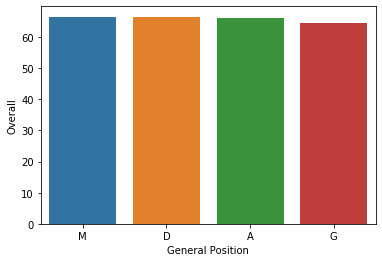

  General Position  Potential
3                M  71.930030
0                A  71.445819
1                D  71.011251
2                G  69.799012


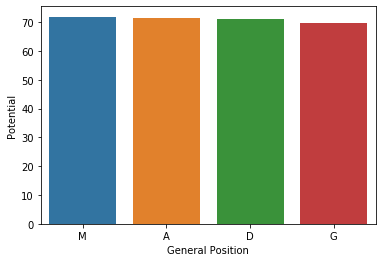

  General Position  Value in K€
3                M     0.074969
0                A     0.073167
1                D    -0.078996
2                G    -0.148485


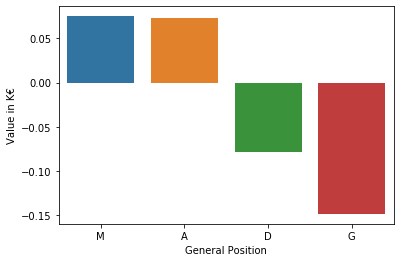

  General Position  Wage in K€
0                A    0.063089
3                M    0.035128
1                D   -0.027823
2                G   -0.134141


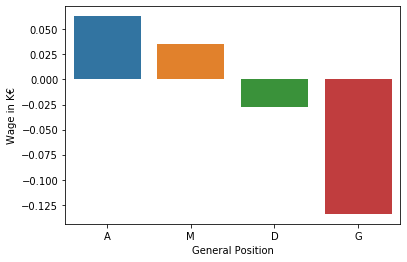

  General Position  International Reputation
0                A                  1.140982
3                M                  1.118856
1                D                  1.099557
2                G                  1.095802


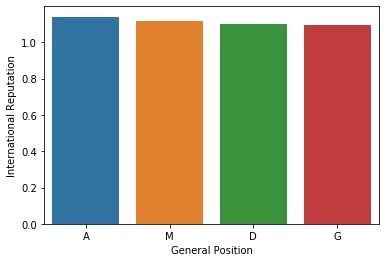

  General Position  Weak Foot
3                M   3.110159
0                A   3.103487
1                D   2.823048
2                G   2.489877


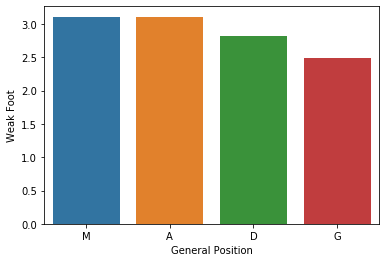

  General Position  Skill Moves
3                M     2.754118
0                A     2.607049
1                D     2.211899
2                G     1.000000


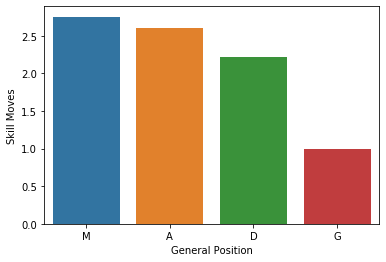

  General Position  Jersey Number
0                A      21.817023
2                G      20.516543
3                M      20.154829
1                D      17.391067


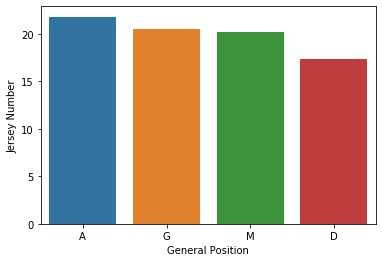

  General Position  Height in cm
2                G    188.234074
1                D    182.624275
0                A    182.046869
3                M    178.011596


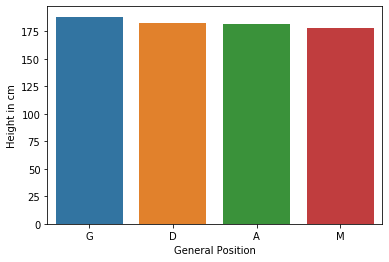

  General Position  Weight in lbs
2                G     180.704691
0                A     168.688414
1                D     168.686498
3                M     159.014231


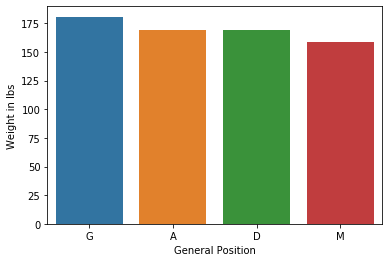

  General Position   Crossing
3                M  58.803531
1                D  51.198602
0                A  47.671916
2                G  14.257284


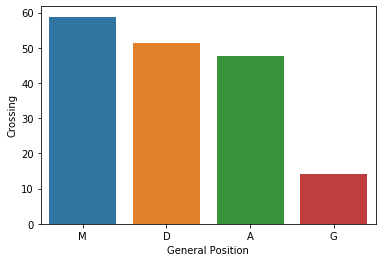

  General Position  Finishing
0                A  66.926884
3                M  55.084728
1                D  35.072451
2                G  12.016296


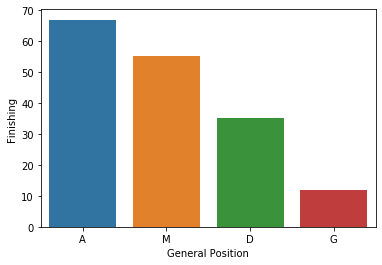

  General Position  HeadingAccuracy
0                A        63.139858
1                D        61.052847
3                M        51.848070
2                G        14.368889


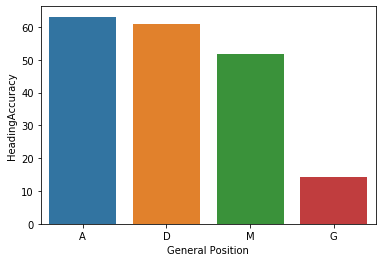

  General Position  ShortPassing
3                M     66.683094
1                D     59.198602
0                A     58.721035
2                G     27.269136


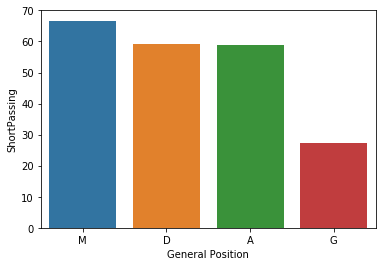

  General Position    Volleys
0                A  58.377953
3                M  51.234155
1                D  35.648483
2                G  12.397037


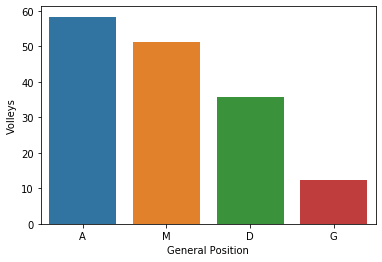

  General Position  Dribbling
3                M  65.845961
0                A  63.699663
1                D  52.376747
2                G  13.856296


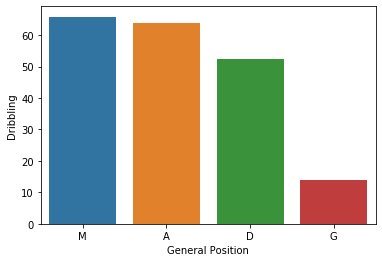

  General Position      Curve
3                M  57.023060
0                A  52.100112
1                D  43.407092
2                G  14.707654


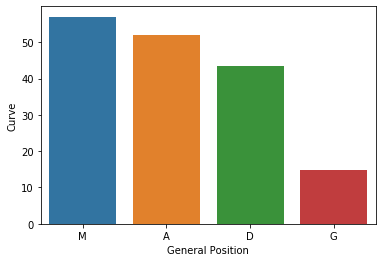

  General Position  FKAccuracy
3                M   52.760575
0                A   45.047244
1                D   38.878111
2                G   14.464198


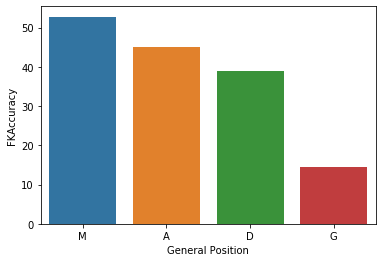

  General Position  LongPassing
3                M    61.665832
1                D    53.500511
0                A    45.990626
2                G    25.808395


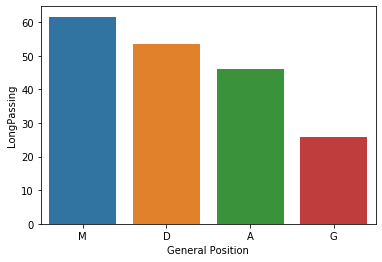

  General Position  BallControl
3                M    66.985637
0                A    64.617173
1                D    57.661439
2                G    19.949630


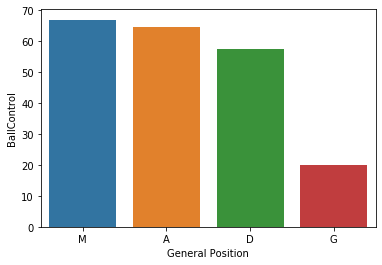

  General Position  Acceleration
3                M     70.309922
0                A     69.328834
1                D     64.174736
2                G     38.320000


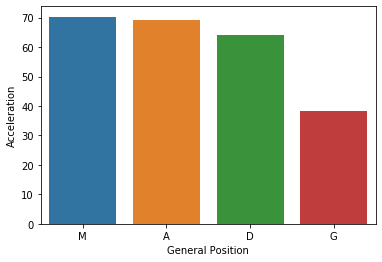

  General Position  SprintSpeed
0                A    70.264342
3                M    69.375939
1                D    65.173202
2                G    38.712099


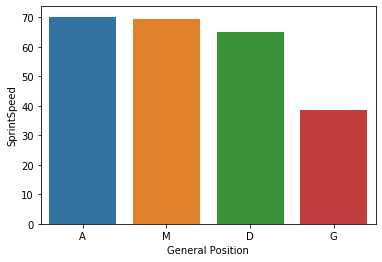

  General Position    Agility
3                M  70.957834
0                A  67.106862
1                D  60.258609
2                G  40.201481


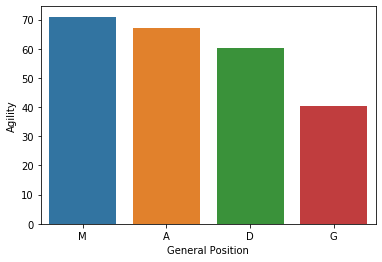

  General Position  Reactions
3                M  62.545922
0                A  62.529434
1                D  61.616434
2                G  58.926420


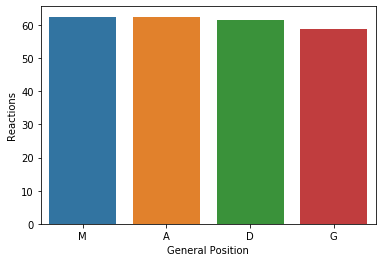

  General Position    Balance
3                M  71.189617
0                A  64.587177
1                D  61.536652
2                G  43.098272


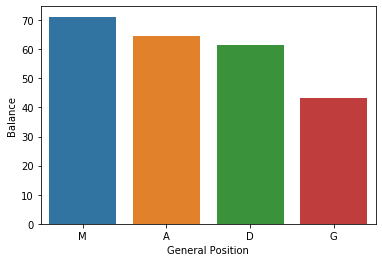

  General Position  ShotPower
0                A  66.646044
3                M  63.465410
1                D  51.400102
2                G  22.533333


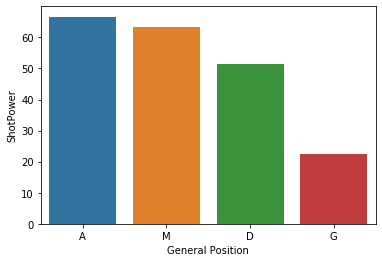

  General Position    Jumping
1                D  69.085578
0                A  68.172103
3                M  62.893267
2                G  57.698272


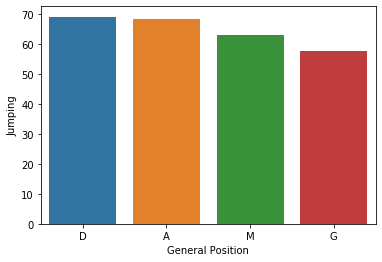

  General Position    Stamina
1                D  68.038186
3                M  67.789432
0                A  64.503562
2                G  30.461728


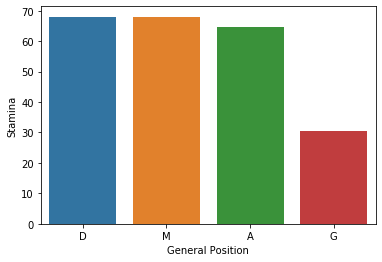

  General Position   Strength
1                D  70.643028
0                A  69.089989
3                M  61.135986
2                G  60.602963


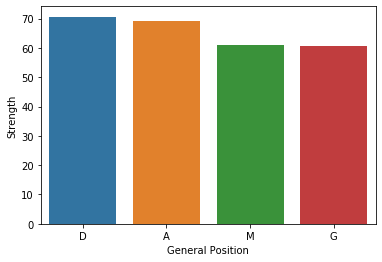

  General Position  LongShots
0                A  60.018748
3                M  57.577942
1                D  39.602966
2                G  12.653333


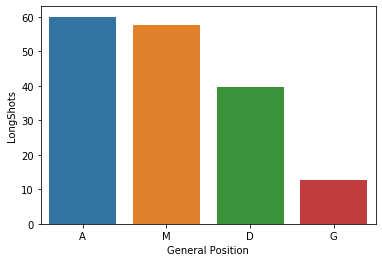

  General Position  Aggression
1                D   65.499489
3                M   57.451179
0                A   52.629546
2                G   26.371852


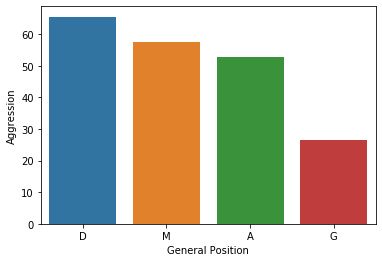

  General Position  Interceptions
1                D      63.805148
3                M      48.392542
0                A      26.791151
2                G      17.052346


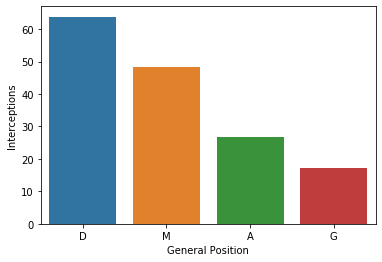

  General Position  Positioning
0                A    65.787777
3                M    59.429701
1                D    43.879475
2                G    11.258765


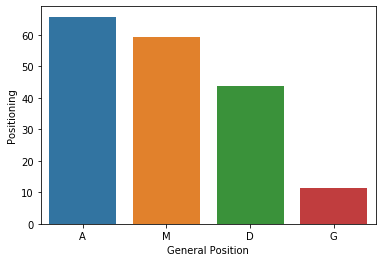

  General Position     Vision
3                M  62.517459
0                A  55.841770
1                D  46.180702
2                G  36.997531


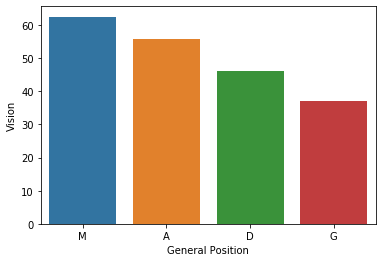

  General Position  Penalties
0                A  63.121860
3                M  54.962973
1                D  43.470167
2                G  20.007407


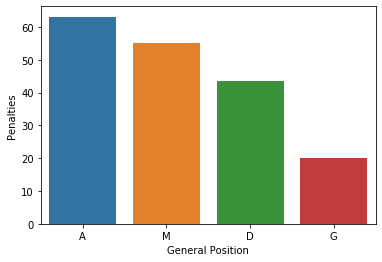

  General Position  Composure
3                M  61.686915
0                A  60.806149
1                D  58.414081
2                G  45.122469


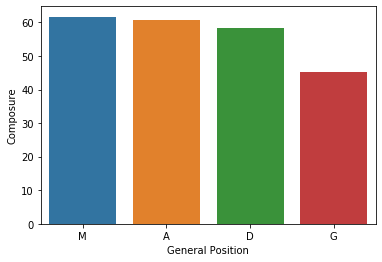

  General Position    Marking
1                D  63.927890
3                M  49.118856
0                A  29.810649
2                G  15.225185


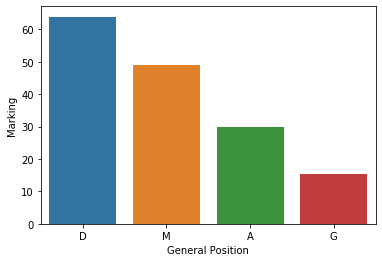

  General Position  StandingTackle
1                D       66.727583
3                M       49.591382
0                A       25.960630
2                G       14.141235


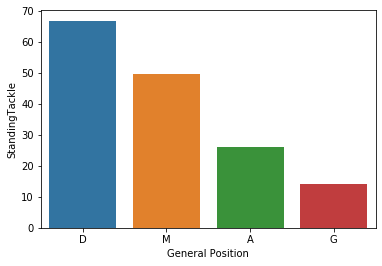

  General Position  SlidingTackle
1                D      65.031879
3                M      46.958888
0                A      23.383202
2                G      14.072099


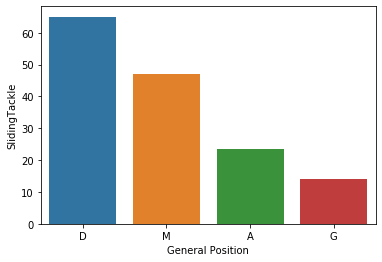

  General Position   GKDiving
2                G  65.323951
1                D  10.545857
3                M  10.487416
0                A  10.429321


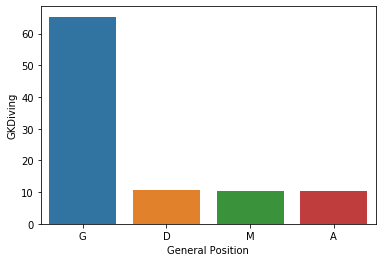

  General Position  GKHandling
2                G   62.868148
0                A   10.574803
1                D   10.561712
3                M   10.545922


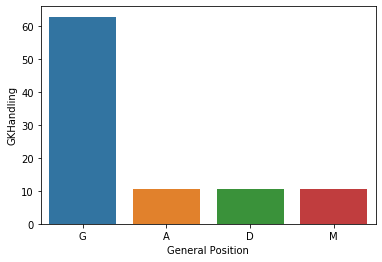

  General Position  GKKicking
2                G  61.477531
0                A  10.590551
3                M  10.555804
1                D  10.524378


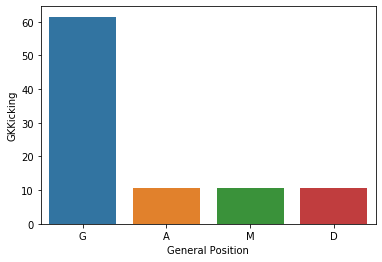

  General Position  GKPositioning
2                G      63.047407
1                D      10.545687
3                M      10.531427
0                A      10.486689


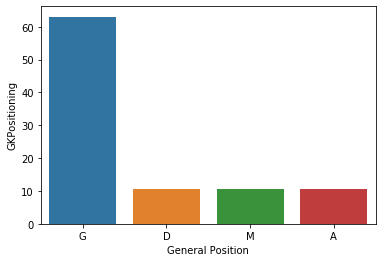

  General Position  GKReflexes
2                G   66.101728
1                D   10.524719
3                M   10.502570
0                A   10.489314


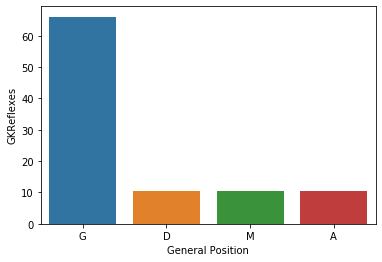

In [12]:
for i in int_values:
    overview = data[['General Position', i]].groupby(['General Position'], as_index=False).mean().sort_values(by=i, ascending=False)
    print(overview)
    ax = sns.barplot(x="General Position", y=i, data=overview)
    plt.show()

   Position             ID
6       LAM  225094.761905
3        CF  223382.162162
14       LW  222837.440945
16      RAM  221661.238095
24       RW  220832.005405
4        CM  219657.205165
22       RM  217594.942171
12       LM  217384.881279
1        CB  216661.757030
0       CAM  216623.881002
25      RWB  216603.540230
26       ST  216490.771840
7        LB  216315.766263
17       RB  215785.365608
2       CDM  214138.619198
15      LWB  213946.897436
10      LDM  209827.123457
5        GK  207877.391111
19      RCM  206962.396419
20      RDM  206956.205645
18      RCB  206600.246224
9       LCM  206543.627848
13       LS  205252.072464
8       LCB  204877.561728
23       RS  204840.152709
21       RF  199944.375000
11       LF  193747.733333


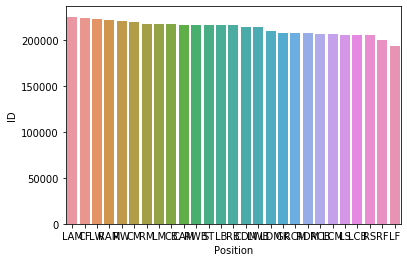

   Position        Age
6       LAM  29.333333
16      RAM  28.714286
21       RF  27.625000
8       LCB  27.052469
20      RDM  27.004032
18      RCB  26.983384
10      LDM  26.876543
13       LS  26.806763
11       LF  26.733333
23       RS  26.679803
19      RCM  26.171355
9       LCM  26.063291
5        GK  26.043457
15      LWB  25.384615
17       RB  25.288923
2       CDM  25.235232
7        LB  25.085477
1        CB  24.818335
26       ST  24.662639
0       CAM  24.580376
12       LM  24.493151
22       RM  24.407473
25      RWB  24.367816
24       RW  23.591892
3        CF  23.513514
4        CM  23.481349
14       LW  23.412073


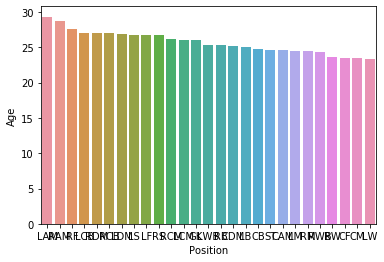

   Position    Overall
11       LF  73.866667
21       RF  73.250000
16      RAM  72.285714
6       LAM  71.857143
13       LS  70.062802
20      RDM  69.754032
23       RS  69.522167
18      RCB  69.283988
9       LCM  69.270886
8       LCB  69.240741
19      RCM  69.076726
10      LDM  69.032922
24       RW  66.929730
0       CAM  66.903967
12       LM  66.692237
14       LW  66.616798
15      LWB  66.512821
22       RM  66.496441
2       CDM  66.313291
17       RB  66.058869
7        LB  65.854766
3        CF  65.824324
26       ST  65.535781
1        CB  65.024747
25      RWB  64.655172
5        GK  64.603457
4        CM  63.729555


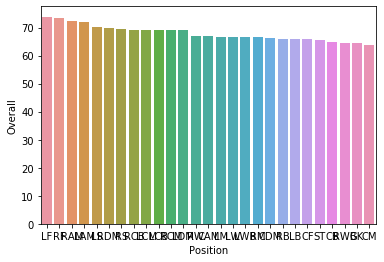

   Position  Potential
11       LF  76.600000
21       RF  75.437500
24       RW  73.329730
14       LW  73.123360
16      RAM  72.857143
13       LS  72.806763
9       LCM  72.784810
3        CF  72.743243
0       CAM  72.639875
6       LAM  72.523810
19      RCM  72.521739
20      RDM  72.483871
23       RS  72.399015
8       LCB  72.308642
10      LDM  72.246914
18      RCB  72.229607
12       LM  71.746119
22       RM  71.543594
2       CDM  71.504219
26       ST  71.114777
1        CB  70.907762
4        CM  70.905308
15      LWB  70.679487
7        LB  70.518154
17       RB  70.474051
25      RWB  69.954023
5        GK  69.799012


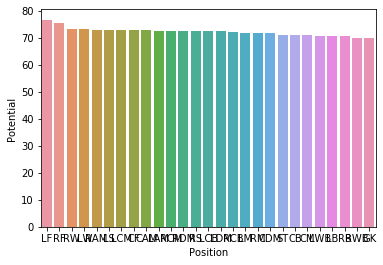

   Position  Value in K€
11       LF     2.630103
21       RF     1.810647
6       LAM     0.651073
16      RAM     0.519758
13       LS     0.439219
9       LCM     0.329710
19      RCM     0.304453
23       RS     0.293184
24       RW     0.216521
14       LW     0.184539
3        CF     0.152408
10      LDM     0.135879
20      RDM     0.128106
0       CAM     0.116968
18      RCB     0.112148
8       LCB     0.105782
12       LM     0.067892
22       RM     0.056864
26       ST    -0.016263
15      LWB    -0.020418
2       CDM    -0.061357
4        CM    -0.080546
25      RWB    -0.084304
7        LB    -0.124841
17       RB    -0.130239
5        GK    -0.148485
1        CB    -0.148524


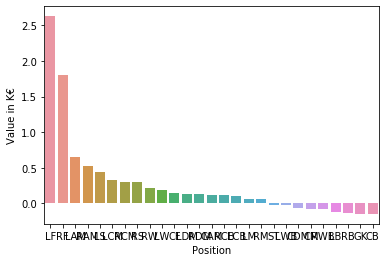

   Position  Wage in K€
21       RF    1.948669
11       LF    1.584576
6       LAM    0.743718
16      RAM    0.423802
13       LS    0.249747
24       RW    0.212142
19      RCM    0.210855
23       RS    0.209730
9       LCM    0.198488
14       LW    0.150217
18      RCB    0.132993
20      RDM    0.108498
10      LDM    0.095374
8       LCB    0.078959
0       CAM    0.021363
3        CF    0.020754
26       ST    0.008133
12       LM   -0.004648
22       RM   -0.009900
2       CDM   -0.020138
15      LWB   -0.030963
7        LB   -0.046850
17       RB   -0.052422
25      RWB   -0.052716
4        CM   -0.064380
1        CB   -0.093252
5        GK   -0.134141


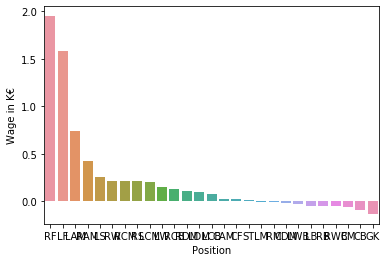

   Position  International Reputation
11       LF                  1.666667
21       RF                  1.562500
6       LAM                  1.238095
13       LS                  1.222222
23       RS                  1.211823
16      RAM                  1.190476
3        CF                  1.189189
9       LCM                  1.184810
19      RCM                  1.181586
18      RCB                  1.155589
8       LCB                  1.149691
24       RW                  1.148649
0       CAM                  1.135699
10      LDM                  1.131687
2       CDM                  1.124473
26       ST                  1.118030
20      RDM                  1.112903
14       LW                  1.104987
25      RWB                  1.103448
12       LM                  1.103196
22       RM                  1.100534
5        GK                  1.095802
15      LWB                  1.089744
17       RB                  1.088304
4        CM                  1.086083
1        CB 

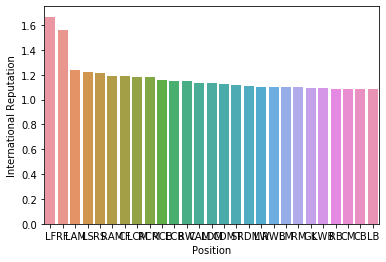

   Position  Weak Foot
11       LF   3.600000
21       RF   3.437500
16      RAM   3.380952
6       LAM   3.285714
13       LS   3.251208
3        CF   3.243243
0       CAM   3.218163
23       RS   3.211823
24       RW   3.181081
19      RCM   3.176471
14       LW   3.175853
12       LM   3.168950
9       LCM   3.136709
22       RM   3.103203
20      RDM   3.072581
26       ST   3.068309
4        CM   3.044476
10      LDM   3.016461
2       CDM   2.969409
25      RWB   2.942529
17       RB   2.920991
18      RCB   2.820242
8       LCB   2.804012
7        LB   2.791225
1        CB   2.780090
15      LWB   2.769231
5        GK   2.489877


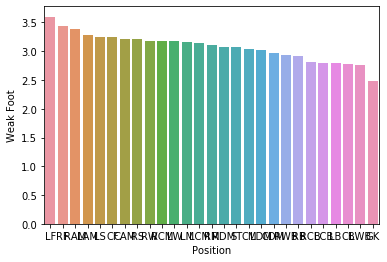

   Position  Skill Moves
11       LF     3.400000
6       LAM     3.333333
21       RF     3.312500
16      RAM     3.285714
14       LW     3.044619
24       RW     3.010811
0       CAM     2.963466
3        CF     2.932432
12       LM     2.919635
22       RM     2.903915
13       LS     2.821256
23       RS     2.798030
9       LCM     2.779747
19      RCM     2.762148
10      LDM     2.592593
20      RDM     2.572581
26       ST     2.546468
4        CM     2.537303
15      LWB     2.512821
7        LB     2.422844
17       RB     2.405887
25      RWB     2.379310
2       CDM     2.325949
8       LCB     2.046296
18      RCB     2.037764
1        CB     2.017998
5        GK     1.000000


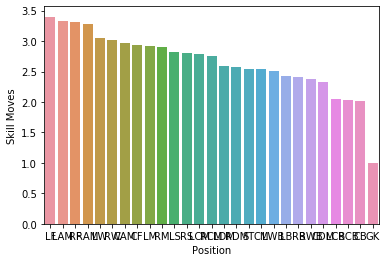

   Position  Jersey Number
24       RW      22.789189
26       ST      22.569703
14       LW      22.385827
3        CF      22.270270
4        CM      21.719512
12       LM      21.210046
0       CAM      20.613779
5        GK      20.516543
25      RWB      20.356322
22       RM      20.185053
2       CDM      19.908228
1        CB      18.944882
13       LS      18.792271
7        LB      18.474281
17       RB      18.218435
23       RS      17.753695
10      LDM      16.909465
11       LF      16.800000
19      RCM      16.212276
20      RDM      16.096774
9       LCM      15.774684
15      LWB      14.564103
16      RAM      14.000000
21       RF      13.875000
8       LCB      13.561728
18      RCB      13.132931
6       LAM      10.380952


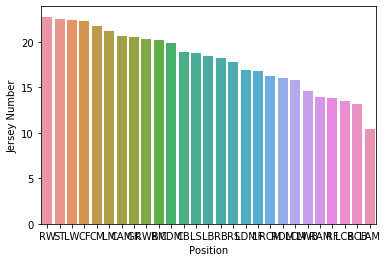

   Position  Height in cm
5        GK    188.234074
18      RCB    186.558912
8       LCB    186.185185
1        CB    186.138358
26       ST    182.317844
13       LS    182.149758
23       RS    181.827586
2       CDM    180.435654
20      RDM    180.395161
10      LDM    179.827160
19      RCM    179.184143
9       LCM    178.944304
4        CM    178.834290
15      LWB    178.807692
25      RWB    178.770115
17       RB    178.608056
7        LB    178.583207
3        CF    177.486486
14       LW    176.942257
22       RM    176.888790
12       LM    176.595434
0       CAM    176.582463
21       RF    176.562500
6       LAM    176.380952
24       RW    176.294595
16      RAM    175.857143
11       LF    173.066667


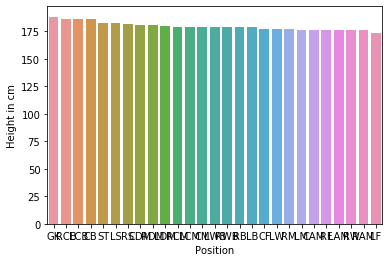

   Position  Weight in lbs
5        GK     180.704691
8       LCB     177.483025
18      RCB     177.205438
1        CB     174.671541
13       LS     170.275362
23       RS     169.985222
26       ST     168.916822
20      RDM     166.221774
2       CDM     164.132911
10      LDM     162.917695
15      LWB     162.064103
25      RWB     161.873563
19      RCM     161.529412
9       LCM     161.098734
7        LB     160.799546
17       RB     160.595662
6       LAM     160.095238
21       RF     160.062500
4        CM     159.581779
3        CF     158.702703
12       LM     157.108676
22       RM     156.531139
14       LW     156.359580
0       CAM     156.027140
24       RW     155.405405
11       LF     154.933333
16      RAM     153.142857


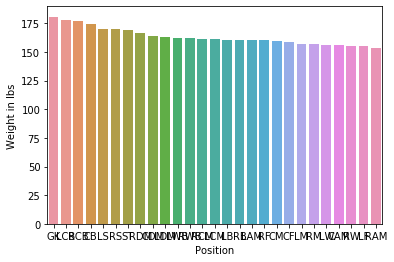

   Position   Crossing
6       LAM  69.285714
21       RF  68.500000
16      RAM  68.428571
11       LF  67.533333
15      LWB  64.461538
7        LB  63.408472
12       LM  62.719635
17       RB  62.547637
22       RM  62.467082
24       RW  62.105405
25      RWB  61.586207
14       LW  61.377953
9       LCM  60.339241
19      RCM  60.232737
0       CAM  59.675365
10      LDM  57.251029
20      RDM  56.556452
3        CF  54.797297
4        CM  54.666428
13       LS  53.415459
23       RS  52.182266
2       CDM  52.126582
26       ST  46.155669
8       LCB  44.083333
18      RCB  41.660121
1        CB  38.934196
5        GK  14.257284


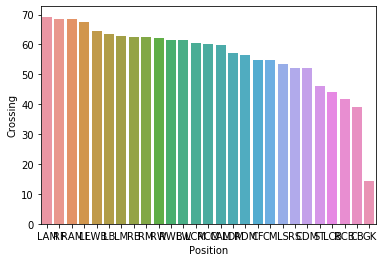

   Position  Finishing
21       RF  70.437500
13       LS  69.879227
23       RS  69.669951
11       LF  69.333333
26       ST  66.421004
3        CF  64.608108
6       LAM  63.714286
16      RAM  63.095238
24       RW  62.356757
14       LW  61.826772
0       CAM  59.442589
12       LM  59.407306
22       RM  59.093416
9       LCM  55.701266
19      RCM  55.375959
20      RDM  51.241935
10      LDM  50.666667
4        CM  49.896700
2       CDM  44.408228
15      LWB  42.576923
25      RWB  41.827586
7        LB  39.929652
17       RB  39.658404
8       LCB  32.305556
18      RCB  32.299094
1        CB  29.512373
5        GK  12.016296


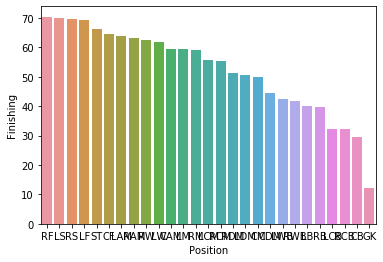

   Position  HeadingAccuracy
18      RCB        68.586103
8       LCB        68.277778
23       RS        64.605911
13       LS        64.328502
1        CB        63.931384
26       ST        63.322955
20      RDM        59.185484
10      LDM        57.790123
2       CDM        57.164557
17       RB        56.193648
7        LB        55.610439
19      RCM        55.296675
9       LCM        54.784810
6       LAM        54.761905
21       RF        54.750000
11       LF        54.466667
15      LWB        54.128205
3        CF        54.040541
25      RWB        52.103448
4        CM        51.724534
16      RAM        50.190476
14       LW        49.419948
22       RM        49.268683
24       RW        49.181081
0       CAM        49.007307
12       LM        48.986301
5        GK        14.368889


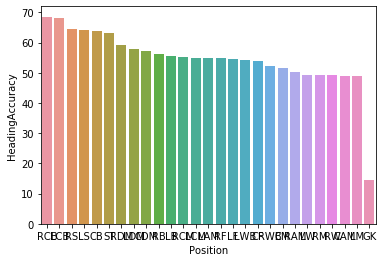

   Position  ShortPassing
11       LF     72.533333
16      RAM     72.190476
21       RF     71.437500
6       LAM     71.000000
9       LCM     70.946835
20      RDM     70.782258
19      RCM     70.685422
10      LDM     70.279835
2       CDM     67.690928
4        CM     67.530846
0       CAM     67.524008
12       LM     64.238356
24       RW     63.829730
22       RM     63.814057
3        CF     63.378378
14       LW     63.188976
13       LS     63.014493
23       RS     62.334975
15      LWB     62.166667
17       RB     61.683191
7        LB     61.326778
25      RWB     60.885057
8       LCB     60.256173
18      RCB     59.595166
26       ST     57.616171
1        CB     55.066367
5        GK     27.269136


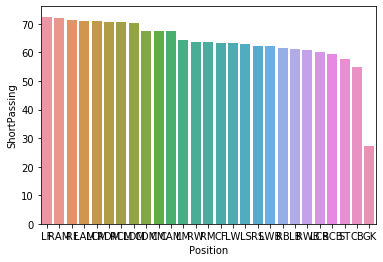

   Position    Volleys
21       RF  65.312500
11       LF  64.933333
13       LS  63.111111
6       LAM  62.952381
16      RAM  62.666667
23       RS  62.059113
3        CF  58.864865
26       ST  57.461431
0       CAM  55.668058
14       LW  55.372703
24       RW  55.348649
12       LM  53.302283
19      RCM  53.196931
22       RM  53.073843
9       LCM  52.483544
20      RDM  49.040323
4        CM  47.966284
10      LDM  47.687243
2       CDM  43.359705
15      LWB  41.320513
25      RWB  39.942529
7        LB  39.282905
17       RB  39.029435
18      RCB  33.626888
8       LCB  33.410494
1        CB  31.600675
5        GK  12.397037


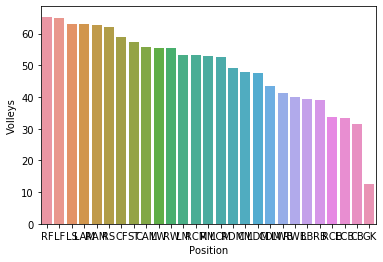

   Position  Dribbling
11       LF  76.666667
16      RAM  73.714286
6       LAM  73.047619
21       RF  72.937500
24       RW  70.010811
14       LW  69.792651
3        CF  68.675676
12       LM  68.619178
22       RM  68.168149
0       CAM  68.109603
13       LS  67.753623
23       RS  66.709360
9       LCM  66.637975
19      RCM  66.171355
10      LDM  63.794239
20      RDM  63.395161
26       ST  62.695632
4        CM  62.634864
15      LWB  62.512821
7        LB  61.595310
25      RWB  61.436782
17       RB  61.237026
2       CDM  59.481013
8       LCB  47.300926
18      RCB  46.235650
1        CB  42.337458
5        GK  13.856296


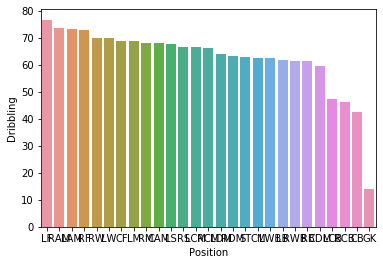

   Position      Curve
21       RF  70.812500
11       LF  68.800000
16      RAM  66.190476
6       LAM  64.714286
0       CAM  61.335073
9       LCM  60.116456
19      RCM  59.393862
3        CF  59.229730
12       LM  59.156164
14       LW  59.131234
24       RW  59.100000
22       RM  58.109431
13       LS  56.526570
23       RS  55.886700
10      LDM  55.563786
15      LWB  55.153846
4        CM  54.208034
20      RDM  53.943548
7        LB  52.621785
26       ST  50.816450
25      RWB  50.241379
2       CDM  49.934599
17       RB  49.707204
8       LCB  39.067901
18      RCB  37.589124
1        CB  34.879078
5        GK  14.707654


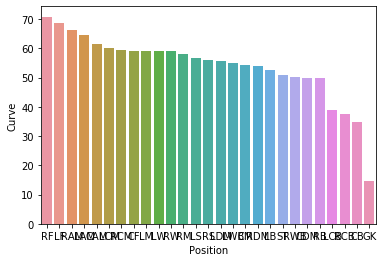

   Position  FKAccuracy
16      RAM   64.333333
21       RF   63.562500
11       LF   61.400000
6       LAM   60.523810
0       CAM   58.118998
9       LCM   57.432911
19      RCM   55.882353
10      LDM   53.979424
3        CF   52.797297
12       LM   52.791781
20      RDM   52.084677
24       RW   51.713514
4        CM   51.428264
14       LW   51.417323
22       RM   51.230427
13       LS   49.318841
23       RS   48.802956
15      LWB   48.256410
2       CDM   48.233122
7        LB   45.563540
26       ST   43.763941
17       RB   41.298218
25      RWB   41.264368
8       LCB   36.373457
18      RCB   35.833837
1        CB   33.668166
5        GK   14.464198


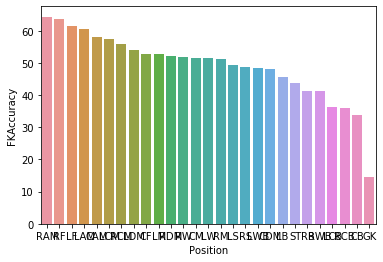

   Position  LongPassing
11       LF    68.733333
9       LCM    67.531646
20      RDM    67.475806
19      RCM    67.381074
10      LDM    67.176955
6       LAM    64.714286
21       RF    64.562500
4        CM    64.156385
2       CDM    64.148734
16      RAM    62.571429
0       CAM    62.546973
12       LM    57.834703
15      LWB    57.423077
22       RM    57.282028
8       LCB    55.564815
25      RWB    55.436782
24       RW    55.418919
7        LB    55.301815
17       RB    55.223083
18      RCB    55.095166
14       LW    54.708661
3        CF    54.202703
13       LS    51.217391
23       RS    49.512315
1        CB    49.297525
26       ST    44.576673
5        GK    25.808395


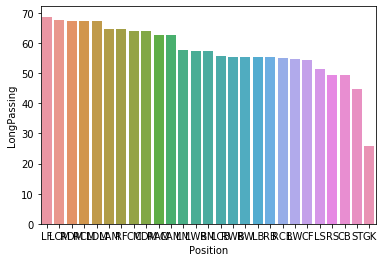

   Position  BallControl
11       LF    76.000000
21       RF    73.812500
16      RAM    73.571429
6       LAM    73.000000
9       LCM    69.493671
19      RCM    69.278772
13       LS    68.845411
0       CAM    68.479123
14       LW    68.233596
24       RW    68.181081
23       RS    67.935961
10      LDM    67.913580
20      RDM    67.875000
3        CF    67.837838
12       LM    67.147032
22       RM    66.764235
4        CM    65.112626
2       CDM    64.598101
15      LWB    64.141026
26       ST    63.638941
17       RB    62.222308
7        LB    62.165658
25      RWB    62.011494
8       LCB    56.720679
18      RCB    56.052870
1        CB    51.445444
5        GK    19.949630


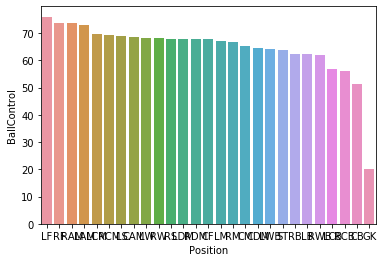

   Position  Acceleration
24       RW     78.027027
14       LW     77.795276
11       LF     77.133333
22       RM     76.818505
12       LM     76.686758
16      RAM     75.238095
21       RF     74.437500
15      LWB     74.025641
25      RWB     73.448276
3        CF     73.324324
6       LAM     73.142857
17       RB     72.398916
23       RS     71.985222
7        LB     71.901664
13       LS     71.700483
0       CAM     70.680585
26       ST     68.620353
9       LCM     66.987342
19      RCM     66.657289
4        CM     65.669297
20      RDM     63.637097
10      LDM     63.518519
2       CDM     61.861814
8       LCB     57.373457
18      RCB     56.811178
1        CB     56.792463
5        GK     38.320000


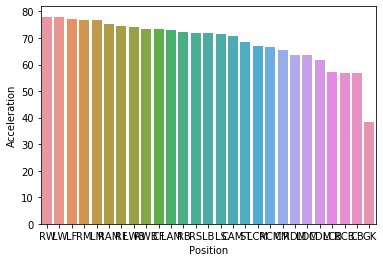

   Position  SprintSpeed
24       RW    77.029730
14       LW    76.721785
22       RM    76.288256
12       LM    75.818265
11       LF    75.066667
16      RAM    74.904762
15      LWB    74.217949
6       LAM    74.047619
25      RWB    73.574713
21       RF    73.562500
23       RS    73.325123
13       LS    72.937198
17       RB    72.565453
7        LB    71.949319
3        CF    71.851351
26       ST    69.605948
0       CAM    68.849687
9       LCM    66.063291
19      RCM    65.670077
4        CM    64.676471
10      LDM    63.069959
20      RDM    62.895161
2       CDM    61.236287
8       LCB    59.626543
18      RCB    59.125378
1        CB    58.232846
5        GK    38.712099


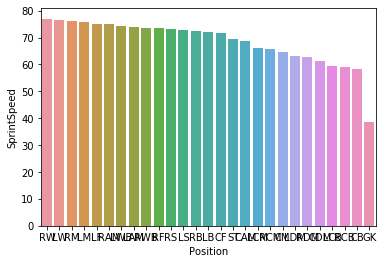

   Position    Agility
11       LF  79.733333
16      RAM  77.761905
6       LAM  76.952381
21       RF  76.562500
14       LW  76.034121
24       RW  75.867568
12       LM  75.378082
22       RM  74.927936
3        CF  74.608108
0       CAM  72.637787
9       LCM  70.681013
15      LWB  70.423077
23       RS  70.177340
13       LS  69.888889
19      RCM  69.792839
25      RWB  69.022989
7        LB  68.238275
17       RB  68.190550
4        CM  67.228838
26       ST  66.133364
10      LDM  66.086420
20      RDM  65.895161
2       CDM  63.859705
8       LCB  54.578704
18      RCB  53.820242
1        CB  52.158605
5        GK  40.201481


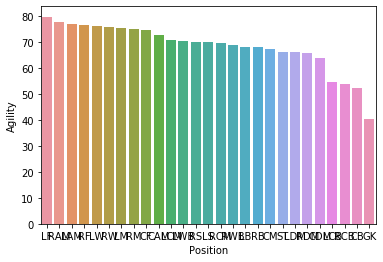

   Position  Reactions
11       LF  71.000000
21       RF  70.500000
16      RAM  70.428571
6       LAM  68.857143
20      RDM  66.842742
19      RCM  66.641944
10      LDM  66.345679
13       LS  66.338164
9       LCM  66.308861
23       RS  66.044335
18      RCB  63.777946
8       LCB  63.638889
2       CDM  63.380802
15      LWB  62.910256
3        CF  62.810811
17       RB  62.465531
7        LB  62.350983
0       CAM  62.090814
26       ST  61.703532
4        CM  61.412482
12       LM  61.253881
22       RM  61.219751
24       RW  61.075676
14       LW  60.706037
25      RWB  60.666667
5        GK  58.926420
1        CB  58.901575


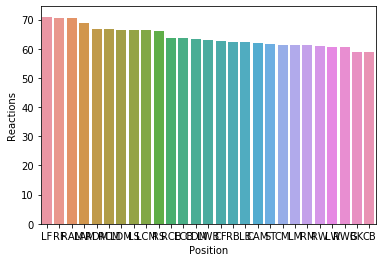

   Position    Balance
11       LF  80.400000
16      RAM  77.095238
6       LAM  75.380952
21       RF  74.375000
24       RW  74.218919
12       LM  74.114155
14       LW  73.795276
3        CF  73.756757
22       RM  73.472420
0       CAM  73.248434
9       LCM  70.767089
15      LWB  69.987179
4        CM  69.761836
19      RCM  69.685422
7        LB  69.210287
17       RB  69.016266
25      RWB  68.827586
20      RDM  67.028226
10      LDM  66.736626
23       RS  66.241379
2       CDM  65.697257
13       LS  65.096618
26       ST  63.883829
8       LCB  55.057099
1        CB  54.853206
18      RCB  53.965257
5        GK  43.098272


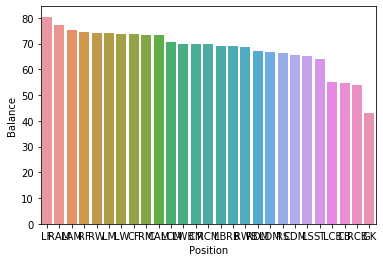

   Position  ShotPower
21       RF  73.250000
11       LF  72.133333
13       LS  70.840580
23       RS  70.059113
9       LCM  66.655696
19      RCM  66.478261
26       ST  65.914498
20      RDM  65.653226
24       RW  65.578378
6       LAM  65.380952
10      LDM  65.131687
14       LW  65.102362
3        CF  64.283784
12       LM  64.062100
0       CAM  63.803758
22       RM  63.232206
16      RAM  62.857143
4        CM  61.385940
2       CDM  60.685654
15      LWB  56.717949
25      RWB  54.057471
7        LB  53.614221
17       RB  52.409760
8       LCB  52.152778
18      RCB  51.501511
1        CB  48.345332
5        GK  22.533333


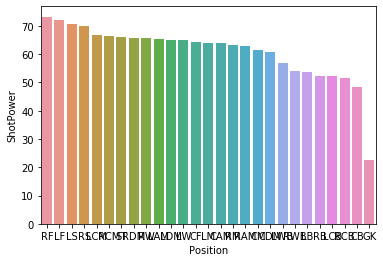

   Position    Jumping
8       LCB  71.337963
11       LF  71.266667
18      RCB  70.959215
23       RS  69.876847
13       LS  69.270531
1        CB  69.268841
15      LWB  68.525641
17       RB  68.419830
20      RDM  68.133065
26       ST  68.058550
7        LB  67.630862
25      RWB  66.793103
2       CDM  66.283755
19      RCM  65.603581
10      LDM  65.106996
9       LCM  65.083544
3        CF  64.391892
4        CM  62.448350
22       RM  62.338078
16      RAM  62.333333
12       LM  62.277626
21       RF  62.187500
6       LAM  61.666667
0       CAM  60.187891
24       RW  59.705405
14       LW  59.614173
5        GK  57.698272


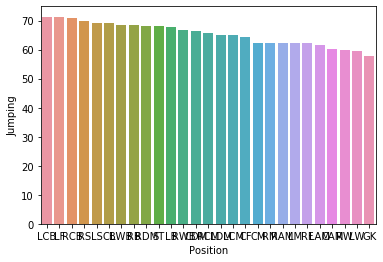

   Position    Stamina
20      RDM  75.854839
19      RCM  74.966752
10      LDM  74.028807
15      LWB  73.897436
9       LCM  73.832911
21       RF  73.312500
25      RWB  72.689655
17       RB  72.510457
7        LB  71.512103
11       LF  70.200000
2       CDM  70.047468
23       RS  69.325123
13       LS  67.980676
18      RCB  67.164653
8       LCB  66.983025
4        CM  66.919656
22       RM  66.807829
16      RAM  66.428571
12       LM  66.351598
6       LAM  65.285714
24       RW  64.481081
14       LW  63.887139
26       ST  63.639405
3        CF  63.621622
0       CAM  63.438413
1        CB  62.433071
5        GK  30.461728


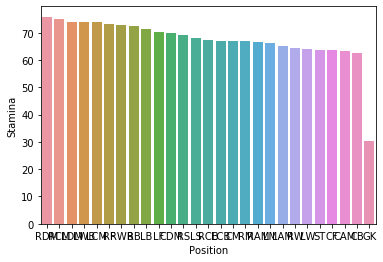

   Position   Strength
18      RCB  78.504532
8       LCB  78.098765
1        CB  74.352081
23       RS  72.073892
13       LS  71.879227
20      RDM  70.560484
26       ST  69.032528
2       CDM  68.354430
10      LDM  68.222222
19      RCM  66.925831
9       LCM  65.850633
17       RB  65.016266
15      LWB  64.858974
7        LB  64.318457
25      RWB  64.275862
21       RF  63.375000
6       LAM  62.523810
11       LF  62.400000
4        CM  61.364419
5        GK  60.602963
12       LM  58.023744
22       RM  57.987544
3        CF  57.364865
14       LW  56.627297
0       CAM  56.344468
24       RW  55.797297
16      RAM  54.190476


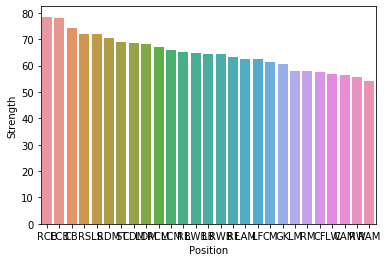

   Position  LongShots
11       LF  70.733333
21       RF  70.562500
13       LS  63.492754
16      RAM  63.428571
6       LAM  62.666667
23       RS  62.408867
9       LCM  62.081013
19      RCM  61.994885
3        CF  61.148649
0       CAM  60.266180
26       ST  59.267193
14       LW  59.204724
10      LDM  59.049383
20      RDM  58.842742
24       RW  58.724324
12       LM  58.031050
22       RM  57.258897
4        CM  55.370875
2       CDM  52.212025
15      LWB  48.230769
25      RWB  45.988506
7        LB  45.707262
17       RB  44.257940
8       LCB  37.094136
18      RCB  36.344411
1        CB  33.120922
5        GK  12.653333


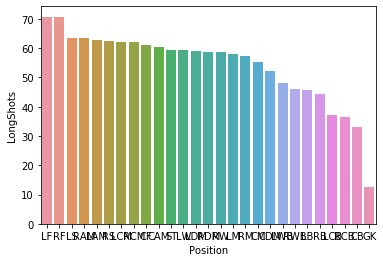

   Position  Aggression
20      RDM   70.580645
18      RCB   70.137462
8       LCB   69.885802
2       CDM   68.577004
10      LDM   67.954733
19      RCM   66.736573
9       LCM   65.567089
1        CB   64.822835
17       RB   64.264136
7        LB   63.483359
15      LWB   63.102564
25      RWB   62.482759
4        CM   60.507174
13       LS   57.724638
23       RS   57.246305
21       RF   55.437500
16      RAM   52.047619
26       ST   51.818773
11       LF   51.666667
0       CAM   51.560543
22       RM   51.136121
12       LM   50.802740
6       LAM   49.571429
3        CF   48.878378
14       LW   48.811024
24       RW   47.018919
5        GK   26.371852


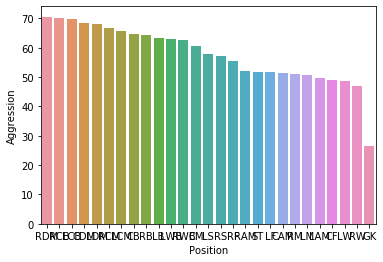

   Position  Interceptions
18      RCB      67.391239
8       LCB      67.362654
20      RDM      66.427419
10      LDM      65.057613
2       CDM      64.553797
17       RB      63.124710
1        CB      62.827897
7        LB      62.674735
19      RCM      62.120205
15      LWB      61.448718
9       LCM      60.756962
25      RWB      59.379310
4        CM      55.538737
16      RAM      46.523810
0       CAM      39.419624
11       LF      38.733333
6       LAM      38.619048
22       RM      38.074733
12       LM      37.825571
21       RF      35.000000
14       LW      32.417323
24       RW      32.281081
23       RS      30.029557
13       LS      29.768116
3        CF      28.378378
26       ST      26.000465
5        GK      17.052346


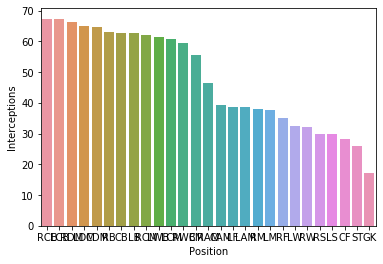

   Position  Positioning
21       RF    70.750000
13       LS    69.937198
11       LF    69.933333
16      RAM    69.714286
23       RS    69.497537
6       LAM    68.142857
26       ST    65.049257
3        CF    63.567568
24       RW    63.405405
14       LW    63.023622
12       LM    62.079452
0       CAM    62.044885
22       RM    61.873665
9       LCM    61.724051
19      RCM    60.772379
10      LDM    57.440329
20      RDM    57.403226
4        CM    56.873745
15      LWB    55.307692
25      RWB    53.689655
17       RB    53.637490
7        LB    53.636914
2       CDM    50.700422
8       LCB    37.074074
18      RCB    36.350453
1        CB    33.841395
5        GK    11.258765


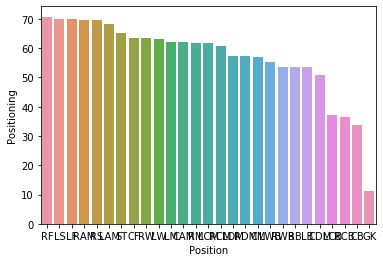

   Position     Vision
16      RAM  72.190476
6       LAM  71.714286
21       RF  71.312500
11       LF  71.000000
9       LCM  67.144304
19      RCM  66.230179
0       CAM  65.916493
20      RDM  64.258065
10      LDM  63.950617
3        CF  62.702703
4        CM  62.345050
24       RW  61.405405
12       LM  61.230137
14       LW  60.908136
22       RM  60.735765
13       LS  59.429952
2       CDM  59.316456
23       RS  58.694581
26       ST  54.770911
15      LWB  54.448718
25      RWB  52.229885
7        LB  51.088502
17       RB  50.972889
8       LCB  44.163580
18      RCB  43.481873
1        CB  40.133296
5        GK  36.997531


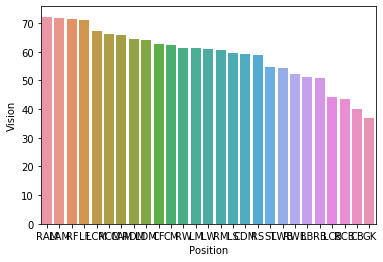

   Position  Penalties
21       RF  65.562500
6       LAM  65.190476
13       LS  65.053140
11       LF  64.933333
23       RS  64.758621
16      RAM  63.619048
26       ST  62.880576
3        CF  59.351351
0       CAM  58.136743
24       RW  57.859459
14       LW  57.490814
9       LCM  56.536709
12       LM  56.431963
22       RM  56.072954
19      RCM  55.552430
20      RDM  53.931452
10      LDM  53.823045
4        CM  51.952654
2       CDM  50.267932
15      LWB  47.320513
7        LB  45.866112
25      RWB  45.528736
17       RB  45.090627
8       LCB  43.125000
18      RCB  42.581571
1        CB  40.699100
5        GK  20.007407


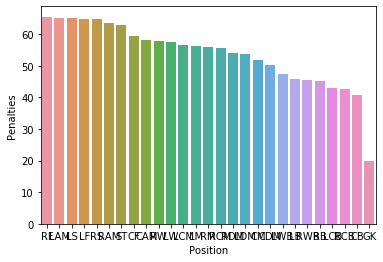

   Position  Composure
11       LF  70.133333
21       RF  70.000000
6       LAM  69.857143
16      RAM  68.380952
19      RCM  66.235294
9       LCM  66.027848
20      RDM  65.838710
13       LS  65.333333
10      LDM  64.995885
23       RS  64.330049
0       CAM  63.111691
8       LCB  61.989198
18      RCB  61.634441
2       CDM  61.020042
3        CF  60.959459
24       RW  60.918919
14       LW  60.847769
12       LM  60.457534
22       RM  59.951068
4        CM  59.914634
26       ST  59.899628
15      LWB  59.410256
17       RB  58.254841
7        LB  58.137670
25      RWB  56.735632
1        CB  56.271654
5        GK  45.122469


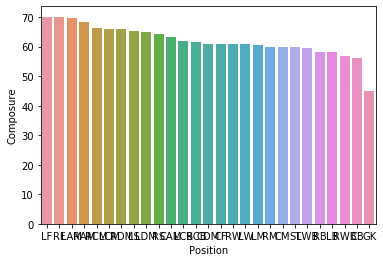

   Position    Marking
18      RCB  67.951662
8       LCB  67.672840
20      RDM  64.608871
10      LDM  63.588477
1        CB  63.313836
2       CDM  63.200422
17       RB  62.889233
7        LB  62.251891
15      LWB  62.051282
25      RWB  60.528736
19      RCM  60.230179
9       LCM  59.045570
4        CM  54.800574
22       RM  41.209075
21       RF  40.937500
12       LM  40.880365
0       CAM  40.631524
11       LF  39.866667
24       RW  35.713514
14       LW  35.674541
23       RS  33.295567
13       LS  33.236715
3        CF  32.621622
16      RAM  32.095238
6       LAM  29.571429
26       ST  28.902881
5        GK  15.225185


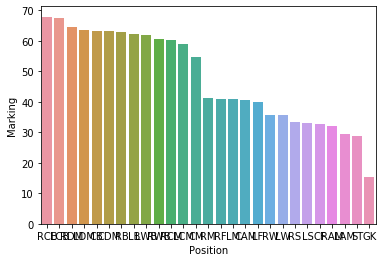

   Position  StandingTackle
8       LCB       69.989198
18      RCB       69.947130
20      RDM       66.931452
1        CB       66.222722
10      LDM       65.962963
17       RB       65.773044
2       CDM       65.624473
7        LB       65.552194
15      LWB       64.141026
25      RWB       62.597701
19      RCM       62.365729
9       LCM       60.850633
4        CM       57.218795
16      RAM       44.809524
0       CAM       41.392484
12       LM       39.208219
22       RM       39.088078
21       RF       37.062500
11       LF       35.600000
6       LAM       34.666667
14       LW       33.944882
24       RW       32.975676
23       RS       29.201970
3        CF       28.945946
13       LS       28.700483
26       ST       25.138941
5        GK       14.141235


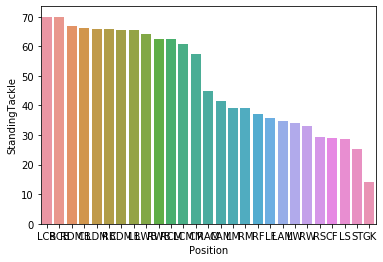

   Position  SlidingTackle
8       LCB      67.762346
18      RCB      67.303625
17       RB      64.869094
7        LB      64.704236
1        CB      63.826772
20      RDM      63.229839
15      LWB      63.025641
2       CDM      62.674051
10      LDM      61.576132
25      RWB      61.229885
19      RCM      58.470588
9       LCM      56.564557
4        CM      54.579627
0       CAM      39.170146
16      RAM      38.619048
22       RM      37.161032
12       LM      37.089498
11       LF      35.133333
21       RF      33.937500
14       LW      31.845144
24       RW      31.194595
6       LAM      30.000000
3        CF      26.054054
13       LS      25.937198
23       RS      25.320197
26       ST      22.702602
5        GK      14.072099


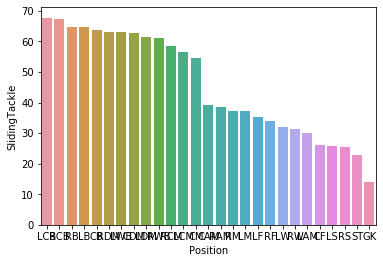

   Position   GKDiving
5        GK  65.323951
6       LAM  11.285714
16      RAM  11.142857
23       RS  10.763547
20      RDM  10.745968
19      RCM  10.693095
25      RWB  10.689655
7        LB  10.683812
15      LWB  10.666667
9       LCM  10.655696
13       LS  10.628019
2       CDM  10.619198
8       LCB  10.598765
18      RCB  10.524169
22       RM  10.516904
21       RF  10.500000
24       RW  10.494595
17       RB  10.479473
1        CB  10.467942
11       LF  10.466667
10      LDM  10.465021
12       LM  10.459361
14       LW  10.451444
26       ST  10.412175
4        CM  10.368006
0       CAM  10.293319
3        CF   9.432432


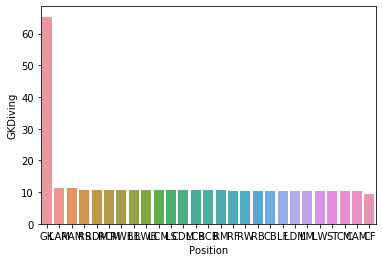

   Position  GKHandling
5        GK   62.868148
11       LF   11.866667
6       LAM   11.285714
23       RS   11.206897
15      LWB   11.192308
21       RF   11.187500
8       LCB   10.898148
20      RDM   10.858871
10      LDM   10.777778
17       RB   10.708753
0       CAM   10.623173
22       RM   10.619217
19      RCM   10.613811
12       LM   10.585388
2       CDM   10.579114
18      RCB   10.572508
25      RWB   10.563218
26       ST   10.552974
24       RW   10.491892
9       LCM   10.478481
1        CB   10.466254
13       LS   10.400966
4        CM   10.377331
7        LB   10.338880
16      RAM   10.333333
14       LW   10.228346
3        CF    9.567568


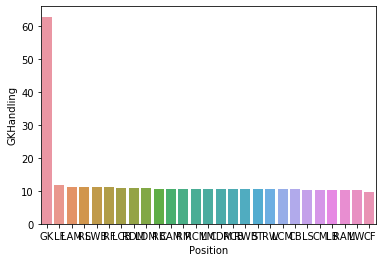

   Position  GKKicking
5        GK  61.477531
21       RF  11.125000
20      RDM  11.104839
18      RCB  10.817221
25      RWB  10.816092
19      RCM  10.767263
0       CAM  10.670146
23       RS  10.640394
13       LS  10.632850
10      LDM  10.609053
26       ST  10.607807
2       CDM  10.574895
22       RM  10.543594
14       LW  10.538058
8       LCB  10.509259
24       RW  10.502703
1        CB  10.501687
17       RB  10.498838
12       LM  10.496804
7        LB  10.456884
4        CM  10.431851
16      RAM  10.380952
6       LAM  10.380952
9       LCM  10.367089
3        CF   9.945946
15      LWB   9.923077
11       LF   9.466667


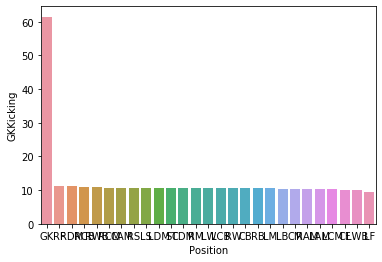

   Position  GKPositioning
5        GK      63.047407
11       LF      11.733333
20      RDM      11.016129
10      LDM      10.773663
23       RS      10.630542
18      RCB      10.629909
19      RCM      10.618926
1        CB      10.613611
8       LCB      10.611111
2       CDM      10.578059
9       LCM      10.564557
4        CM      10.558824
22       RM      10.532918
7        LB      10.512859
26       ST      10.502323
0       CAM      10.491649
17       RB      10.474826
12       LM      10.462100
21       RF      10.437500
14       LW      10.325459
24       RW      10.313514
13       LS      10.280193
25      RWB      10.218391
3        CF       9.972973
15      LWB       9.833333
16      RAM       9.809524
6       LAM       9.476190


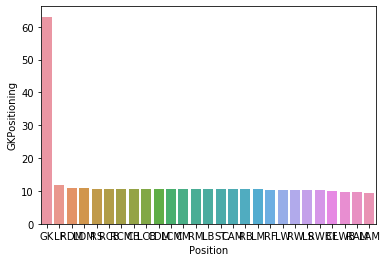

   Position  GKReflexes
5        GK   66.101728
16      RAM   11.714286
6       LAM   11.333333
20      RDM   11.036290
11       LF   10.800000
15      LWB   10.743590
18      RCB   10.672205
13       LS   10.599034
23       RS   10.576355
22       RM   10.573843
10      LDM   10.572016
7        LB   10.567322
2       CDM   10.565401
1        CB   10.538808
12       LM   10.523288
19      RCM   10.519182
26       ST   10.480019
9       LCM   10.473418
17       RB   10.449264
8       LCB   10.436728
4        CM   10.431133
14       LW   10.419948
0       CAM   10.367432
3        CF   10.270270
24       RW   10.262162
25      RWB   10.045977
21       RF    9.937500


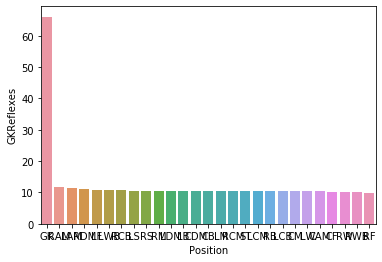

In [13]:
for i in int_values:
    overview = data[['Position', i]].groupby(['Position'], as_index=False).mean().sort_values(by=i, ascending=False)
    print(overview)
    ax = sns.barplot(x="Position", y=i, data=overview)
    plt.show()

In [14]:
data = data.drop(["ID", "Name", "Age", "Overall", "Potential", "Work Rate", "International Reputation", "Reactions"], axis=1)
data.head()

,Value in K€,Wage in K€,Weak Foot,Skill Moves,Position,General Position,Jersey Number,Height in cm,Weight in lbs,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,19.291201,25.204265,4,4,RF,A,10,170,159,84,...,75,96,33,28,26,6,11,15,14,8
1,13.311911,17.941324,4,5,ST,A,7,188,183,84,...,85,95,28,31,23,7,11,15,14,11
2,20.719091,12.721085,5,5,LW,M,10,175,150,79,...,81,94,27,24,33,9,9,15,15,11
3,12.419480,11.359284,3,1,GK,G,1,193,168,17,...,40,68,15,21,13,90,85,87,88,94
4,17.774068,15.671655,5,4,RCM,M,7,180,154,93,...,79,88,68,58,51,15,13,5,10,13


In [15]:
UndefinedPlayers = UndefinedPlayers.drop(["ID", "Name", "Age", "Overall", "Potential", "Work Rate", "International Reputation", "Reactions"], axis=1)
UndefinedPlayers.head()

,Value,Wage,Weak Foot,Skill Moves,General Position,Jersey Number,Height in cm,Weight,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,1,1,3,2,D,16,180,172,25,36,...,77,64,79,70,70,16,8,11,12,13
1,1,1,3,3,A,17,175,154,64,73,...,69,67,12,34,33,16,13,15,16,8
2,1,1,3,2,D,5,180,190,59,39,...,42,54,72,71,64,11,7,8,12,12
3,1,1,4,3,A,18,170,143,52,70,...,67,64,19,24,23,13,11,11,7,9
4,1,1,2,2,M,6,175,154,72,48,...,39,57,68,69,68,14,12,11,14,12


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 42 columns):
Value in K€         18147 non-null float64
Wage in K€          18147 non-null float64
Weak Foot           18147 non-null int64
Skill Moves         18147 non-null int64
Position            18147 non-null object
General Position    18147 non-null object
Jersey Number       18147 non-null int64
Height in cm        18147 non-null int64
Weight in lbs       18147 non-null int64
Crossing            18147 non-null int64
Finishing           18147 non-null int64
HeadingAccuracy     18147 non-null int64
ShortPassing        18147 non-null int64
Volleys             18147 non-null int64
Dribbling           18147 non-null int64
Curve               18147 non-null int64
FKAccuracy          18147 non-null int64
LongPassing         18147 non-null int64
BallControl         18147 non-null int64
Acceleration        18147 non-null int64
SprintSpeed         18147 non-null int64
Agility             1814

In [17]:
UndefinedPlayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 41 columns):
Value               12 non-null int64
Wage                12 non-null int64
Weak Foot           12 non-null int64
Skill Moves         12 non-null int64
General Position    12 non-null object
Jersey Number       12 non-null int64
Height in cm        12 non-null int64
Weight              12 non-null int64
Crossing            12 non-null int64
Finishing           12 non-null int64
HeadingAccuracy     12 non-null int64
ShortPassing        12 non-null int64
Volleys             12 non-null int64
Dribbling           12 non-null int64
Curve               12 non-null int64
FKAccuracy          12 non-null int64
LongPassing         12 non-null int64
BallControl         12 non-null int64
Acceleration        12 non-null int64
SprintSpeed         12 non-null int64
Agility             12 non-null int64
Balance             12 non-null int64
ShotPower           12 non-null int64
Jumping             12

## Splitting data and shuffeling

In [18]:
X = data.drop(["General Position","Position"], axis=1)
y = data["General Position"] 
test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=True, random_state=1)
print(X_train.shape, X_test.shape)

(14517, 40) (3630, 40)


In [19]:
X2 = data.drop(["General Position","Position"], axis=1)
y2 = data["Position"] 
test_ratio = 0.2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=test_ratio, shuffle=True, random_state=1)
print(X_train2.shape, X_test2.shape)

(14517, 40) (3630, 40)


In [20]:
UP = UndefinedPlayers.drop(["General Position"], axis=1)
UP2 = UndefinedPlayers["General Position"]

# Classifiers
## Logistic Regression
### General Position
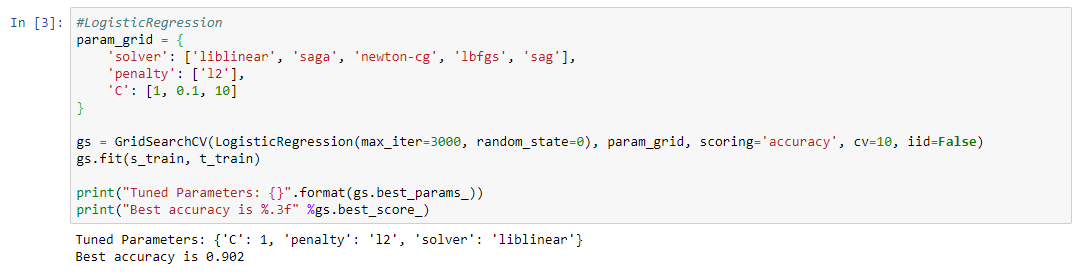

In [21]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 1, max_iter = 3000, random_state=0)
lr = lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
print('accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

accuracy 0.895
              precision    recall  f1-score   support

           A       0.86      0.82      0.84       534
           D       0.91      0.91      0.91      1162
           G       1.00      1.00      1.00       397
           M       0.87      0.88      0.88      1537

    accuracy                           0.89      3630
   macro avg       0.91      0.90      0.91      3630
weighted avg       0.89      0.89      0.89      3630

[[ 437    3    0   94]
 [   1 1054    0  107]
 [   0    0  397    0]
 [  72  105    0 1360]]


### Undefined Player Data

In [22]:
predictions = lr.predict(UP)
print('accuracy %.3f' % metrics.accuracy_score(UP2, predictions))
print(metrics.classification_report(UP2, predictions))
print(metrics.confusion_matrix(UP2, predictions))

accuracy 0.833
              precision    recall  f1-score   support

           A       0.80      1.00      0.89         4
           D       0.80      1.00      0.89         4
           G       1.00      1.00      1.00         1
           M       1.00      0.33      0.50         3

    accuracy                           0.83        12
   macro avg       0.90      0.83      0.82        12
weighted avg       0.87      0.83      0.80        12

[[4 0 0 0]
 [0 4 0 0]
 [0 0 1 0]
 [1 1 0 1]]


### Position

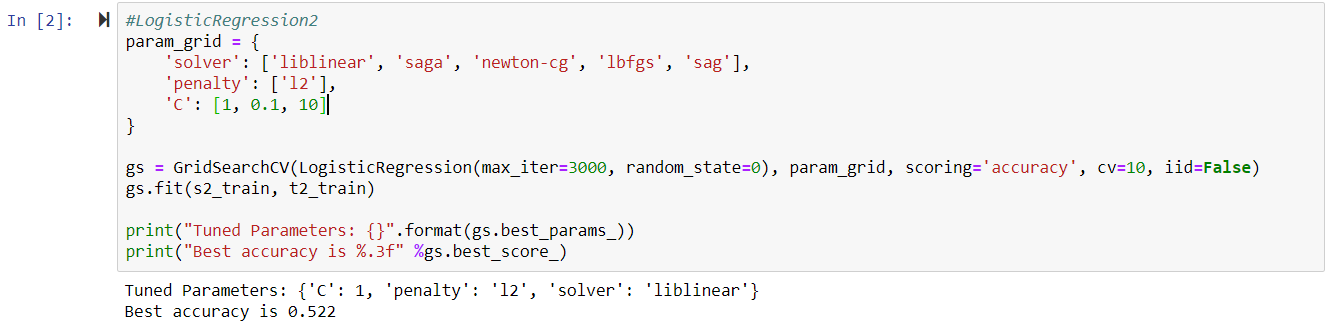

In [23]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 1, max_iter = 3000, random_state=0)
lr = lr.fit(X_train2, y_train2)
predictions = lr.predict(X_test2)
print('accuracy %.3f' % metrics.accuracy_score(y_test2, predictions))
print(metrics.classification_report(y_test2, predictions))

accuracy 0.512
              precision    recall  f1-score   support

         CAM       0.46      0.49      0.47       195
          CB       0.56      0.83      0.67       368
         CDM       0.36      0.41      0.38       197
          CF       0.00      0.00      0.00        14
          CM       0.38      0.66      0.48       289
          GK       1.00      1.00      1.00       397
         LAM       0.00      0.00      0.00         7
          LB       0.41      0.54      0.47       248
         LCB       0.18      0.02      0.04       134
         LCM       0.10      0.03      0.05        87
         LDM       0.00      0.00      0.00        50
          LF       0.00      0.00      0.00         6
          LM       0.25      0.25      0.25       211
          LS       0.00      0.00      0.00        52
          LW       0.25      0.01      0.03        73
         LWB       0.00      0.00      0.00        15
         RAM       0.00      0.00      0.00         2
          RB

## Multi-Layer Perceptron
### General Position

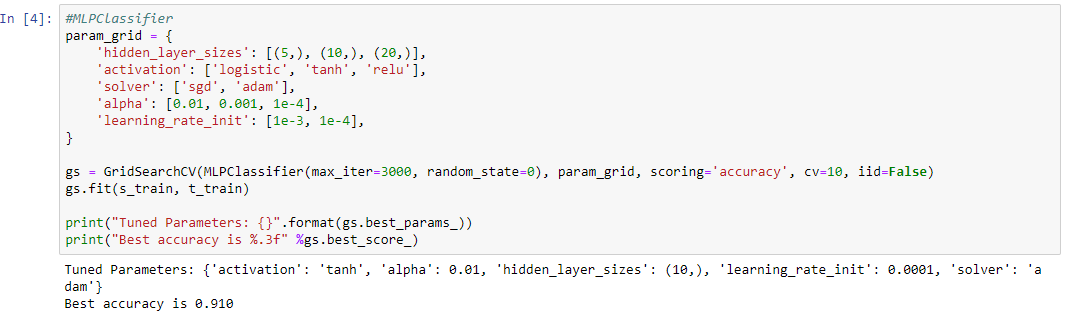

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(10, ),activation='tanh', solver='adam', 
                    alpha=0.01, learning_rate_init=0.0001, max_iter=3000, random_state=0)

# Fit the model to our training data
mlp = mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
print('accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

accuracy 0.905
              precision    recall  f1-score   support

           A       0.90      0.78      0.84       534
           D       0.92      0.92      0.92      1162
           G       1.00      1.00      1.00       397
           M       0.87      0.91      0.89      1537

    accuracy                           0.90      3630
   macro avg       0.92      0.90      0.91      3630
weighted avg       0.91      0.90      0.90      3630

[[ 418    3    0  113]
 [   0 1069    0   93]
 [   0    0  397    0]
 [  46   90    0 1401]]


### Undefiend Player Data

In [25]:
predictions = mlp.predict(UP)
print('accuracy %.3f' % metrics.accuracy_score(UP2, predictions))
print(metrics.classification_report(UP2, predictions))
print(metrics.confusion_matrix(UP2, predictions))

accuracy 0.750
              precision    recall  f1-score   support

           A       1.00      0.50      0.67         4
           D       0.80      1.00      0.89         4
           G       1.00      1.00      1.00         1
           M       0.50      0.67      0.57         3

    accuracy                           0.75        12
   macro avg       0.82      0.79      0.78        12
weighted avg       0.81      0.75      0.74        12

[[2 0 0 2]
 [0 4 0 0]
 [0 0 1 0]
 [0 1 0 2]]


### Position

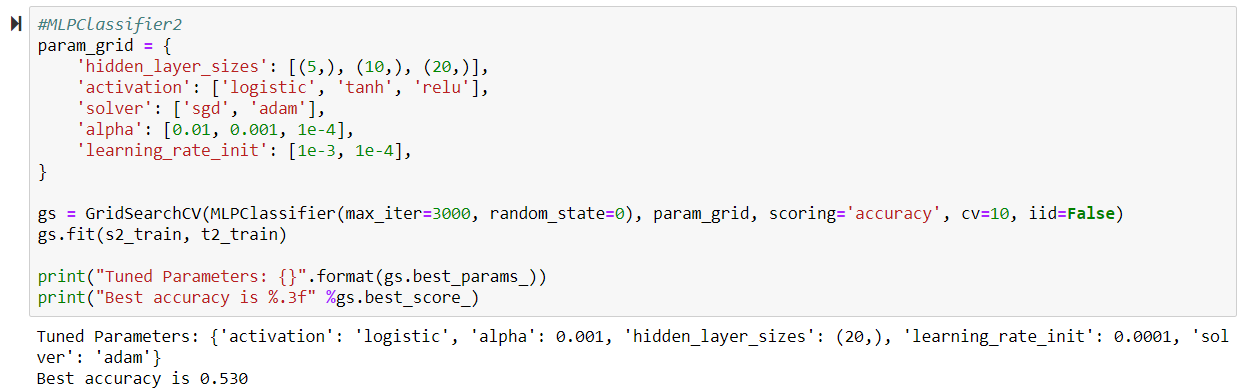

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(20, ),activation='logistic', solver='adam', 
                    alpha=0.001, learning_rate_init=0.0001, max_iter=3000, random_state=0)

# Fit the model to our training data
mlp = mlp.fit(X_train2, y_train2)
predictions = mlp.predict(X_test2)
print('accuracy %.3f' % metrics.accuracy_score(y_test2, predictions))
print(metrics.classification_report(y_test2, predictions))

accuracy 0.523
              precision    recall  f1-score   support

         CAM       0.40      0.59      0.48       195
          CB       0.55      0.87      0.68       368
         CDM       0.39      0.61      0.48       197
          CF       0.00      0.00      0.00        14
          CM       0.44      0.75      0.56       289
          GK       1.00      1.00      1.00       397
         LAM       0.00      0.00      0.00         7
          LB       0.43      0.51      0.47       248
         LCB       0.40      0.04      0.08       134
         LCM       0.00      0.00      0.00        87
         LDM       0.00      0.00      0.00        50
          LF       0.00      0.00      0.00         6
          LM       0.22      0.24      0.23       211
          LS       0.00      0.00      0.00        52
          LW       0.00      0.00      0.00        73
         LWB       0.00      0.00      0.00        15
         RAM       0.00      0.00      0.00         2
          RB

## Random Forest
### General Position

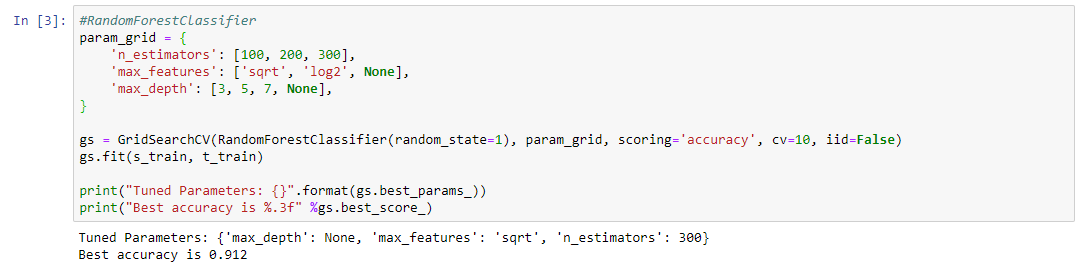

In [27]:
rm = RandomForestClassifier(n_estimators=300, max_depth = None, max_features = 'sqrt', random_state=1)
rm.fit(X_train, y_train)
predictions = rm.predict(X_test)
print('accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

accuracy 0.905
              precision    recall  f1-score   support

           A       0.87      0.83      0.85       534
           D       0.91      0.93      0.92      1162
           G       1.00      1.00      1.00       397
           M       0.89      0.89      0.89      1537

    accuracy                           0.90      3630
   macro avg       0.92      0.91      0.91      3630
weighted avg       0.90      0.90      0.90      3630

[[ 442    0    0   92]
 [   0 1079    0   83]
 [   0    0  397    0]
 [  68  102    0 1367]]


### Undefined Player Data

In [28]:
predictions = rm.predict(UP)
print('accuracy %.3f' % metrics.accuracy_score(UP2, predictions))
print(metrics.classification_report(UP2, predictions))
print(metrics.confusion_matrix(UP2, predictions))

accuracy 0.750
              precision    recall  f1-score   support

           A       0.75      0.75      0.75         4
           D       0.80      1.00      0.89         4
           G       1.00      1.00      1.00         1
           M       0.50      0.33      0.40         3

    accuracy                           0.75        12
   macro avg       0.76      0.77      0.76        12
weighted avg       0.72      0.75      0.73        12

[[3 0 0 1]
 [0 4 0 0]
 [0 0 1 0]
 [1 1 0 1]]


### Position

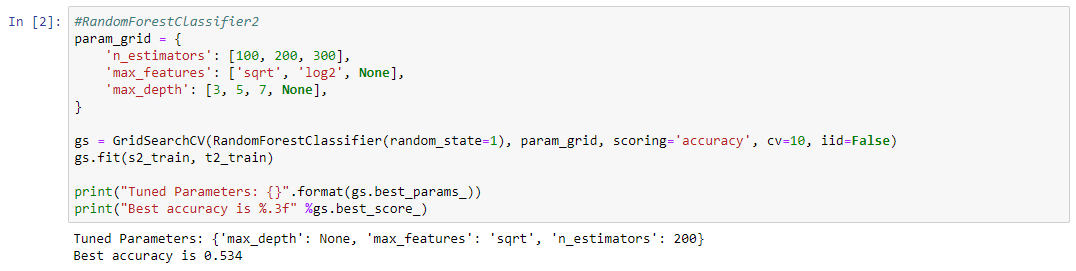

In [29]:
rm = RandomForestClassifier(n_estimators=200, max_depth = None, max_features = 'sqrt', random_state=1)
rm.fit(X_train2, y_train2)
predictions = rm.predict(X_test2)
print('accuracy %.3f' % metrics.accuracy_score(y_test2, predictions))
print(metrics.classification_report(y_test2, predictions))

accuracy 0.533
              precision    recall  f1-score   support

         CAM       0.46      0.49      0.48       195
          CB       0.55      0.87      0.67       368
         CDM       0.38      0.55      0.45       197
          CF       0.00      0.00      0.00        14
          CM       0.44      0.76      0.56       289
          GK       1.00      1.00      1.00       397
         LAM       0.00      0.00      0.00         7
          LB       0.44      0.60      0.51       248
         LCB       0.46      0.04      0.08       134
         LCM       0.00      0.00      0.00        87
         LDM       0.00      0.00      0.00        50
          LF       0.00      0.00      0.00         6
          LM       0.28      0.27      0.27       211
          LS       0.00      0.00      0.00        52
          LW       0.00      0.00      0.00        73
         LWB       0.00      0.00      0.00        15
         RAM       0.00      0.00      0.00         2
          RB

## Support Vector Machine
### General Position

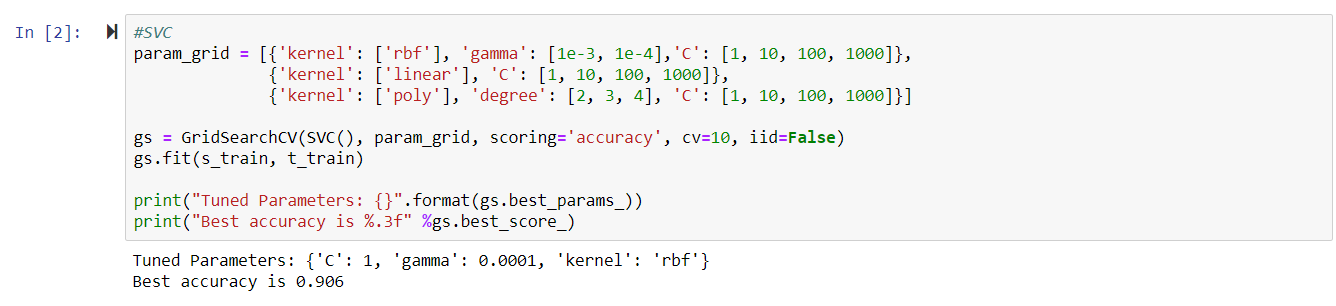

In [30]:
svm = SVC(kernel='rbf', C = 1, gamma = 0.0001)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print('accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

accuracy 0.912
              precision    recall  f1-score   support

           A       0.88      0.84      0.86       534
           D       0.92      0.93      0.92      1162
           G       1.00      1.00      1.00       397
           M       0.89      0.90      0.90      1537

    accuracy                           0.91      3630
   macro avg       0.92      0.92      0.92      3630
weighted avg       0.91      0.91      0.91      3630

[[ 446    2    0   86]
 [   0 1077    0   85]
 [   0    0  397    0]
 [  60   88    0 1389]]


### Undefined Player Data

In [31]:
predictions = svm.predict(UP)
print('accuracy %.3f' % metrics.accuracy_score(UP2, predictions))
print(metrics.classification_report(UP2, predictions))
print(metrics.confusion_matrix(UP2, predictions))

accuracy 0.750
              precision    recall  f1-score   support

           A       1.00      0.50      0.67         4
           D       0.80      1.00      0.89         4
           G       1.00      1.00      1.00         1
           M       0.50      0.67      0.57         3

    accuracy                           0.75        12
   macro avg       0.82      0.79      0.78        12
weighted avg       0.81      0.75      0.74        12

[[2 0 0 2]
 [0 4 0 0]
 [0 0 1 0]
 [0 1 0 2]]


### Position

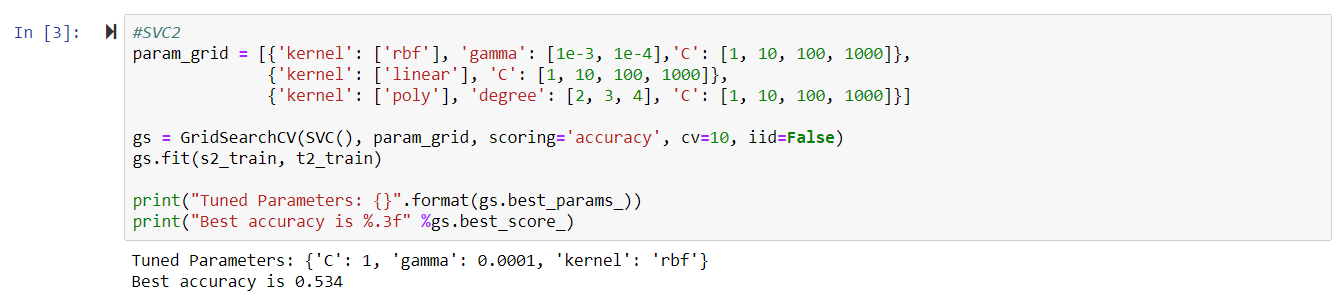

In [32]:
svm = SVC(kernel='rbf', C = 1, gamma = 0.0001)
svm.fit(X_train2, y_train2)
predictions = svm.predict(X_test2)
print('accuracy %.3f' % metrics.accuracy_score(y_test2, predictions))
print(metrics.classification_report(y_test2, predictions))

accuracy 0.533
              precision    recall  f1-score   support

         CAM       0.50      0.57      0.53       195
          CB       0.54      0.90      0.68       368
         CDM       0.40      0.61      0.48       197
          CF       0.00      0.00      0.00        14
          CM       0.43      0.76      0.55       289
          GK       1.00      1.00      1.00       397
         LAM       0.00      0.00      0.00         7
          LB       0.43      0.51      0.47       248
         LCB       0.00      0.00      0.00       134
         LCM       0.00      0.00      0.00        87
         LDM       0.00      0.00      0.00        50
          LF       0.00      0.00      0.00         6
          LM       0.27      0.27      0.27       211
          LS       0.00      0.00      0.00        52
          LW       0.00      0.00      0.00        73
         LWB       0.00      0.00      0.00        15
         RAM       0.00      0.00      0.00         2
          RB

## Decision Tree
### General Position

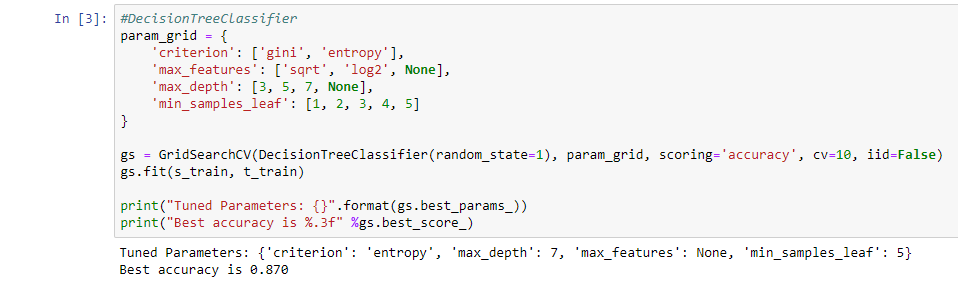

In [33]:
dt = DecisionTreeClassifier(random_state=1, criterion = 'entropy', max_depth = 7, max_features = None, min_samples_leaf = 5)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print('accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

accuracy 0.869
              precision    recall  f1-score   support

           A       0.81      0.80      0.81       534
           D       0.87      0.89      0.88      1162
           G       1.00      1.00      1.00       397
           M       0.85      0.84      0.85      1537

    accuracy                           0.87      3630
   macro avg       0.88      0.88      0.88      3630
weighted avg       0.87      0.87      0.87      3630

[[ 427    3    0  104]
 [   4 1038    0  120]
 [   0    0  397    0]
 [  93  151    0 1293]]


### Undefined Player Data

In [34]:
predictions = dt.predict(UP)
print('accuracy %.3f' % metrics.accuracy_score(UP2, predictions))
print(metrics.classification_report(UP2, predictions))
print(metrics.confusion_matrix(UP2, predictions))

accuracy 0.833
              precision    recall  f1-score   support

           A       1.00      0.75      0.86         4
           D       0.80      1.00      0.89         4
           G       1.00      1.00      1.00         1
           M       0.67      0.67      0.67         3

    accuracy                           0.83        12
   macro avg       0.87      0.85      0.85        12
weighted avg       0.85      0.83      0.83        12

[[3 0 0 1]
 [0 4 0 0]
 [0 0 1 0]
 [0 1 0 2]]


### Position

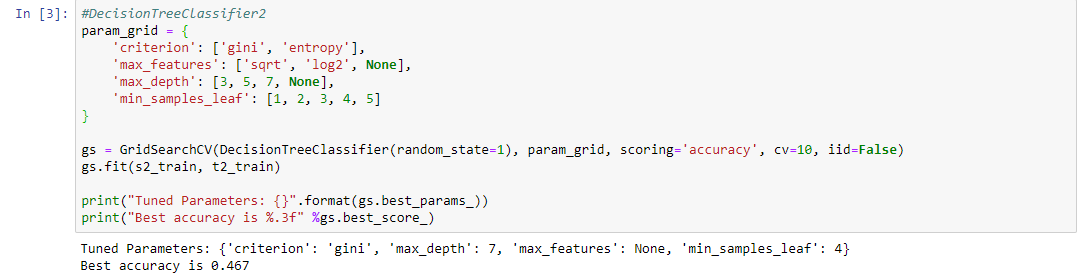

In [35]:
dt = DecisionTreeClassifier(random_state=1, criterion = 'gini', max_depth = 7, max_features = None, min_samples_leaf = 4)
dt.fit(X_train2, y_train2)
predictions = dt.predict(X_test2)
print('accuracy %.3f' % metrics.accuracy_score(y_test2, predictions))
print(metrics.classification_report(y_test2, predictions))

accuracy 0.467
              precision    recall  f1-score   support

         CAM       0.37      0.38      0.38       195
          CB       0.52      0.80      0.63       368
         CDM       0.22      0.50      0.31       197
          CF       0.00      0.00      0.00        14
          CM       0.35      0.49      0.40       289
          GK       1.00      1.00      1.00       397
         LAM       0.00      0.00      0.00         7
          LB       0.32      0.65      0.43       248
         LCB       0.25      0.01      0.01       134
         LCM       0.00      0.00      0.00        87
         LDM       0.00      0.00      0.00        50
          LF       0.00      0.00      0.00         6
          LM       0.21      0.25      0.23       211
          LS       0.00      0.00      0.00        52
          LW       0.00      0.00      0.00        73
         LWB       0.00      0.00      0.00        15
         RAM       0.00      0.00      0.00         2
          RB

## K Neighbors
### General Position

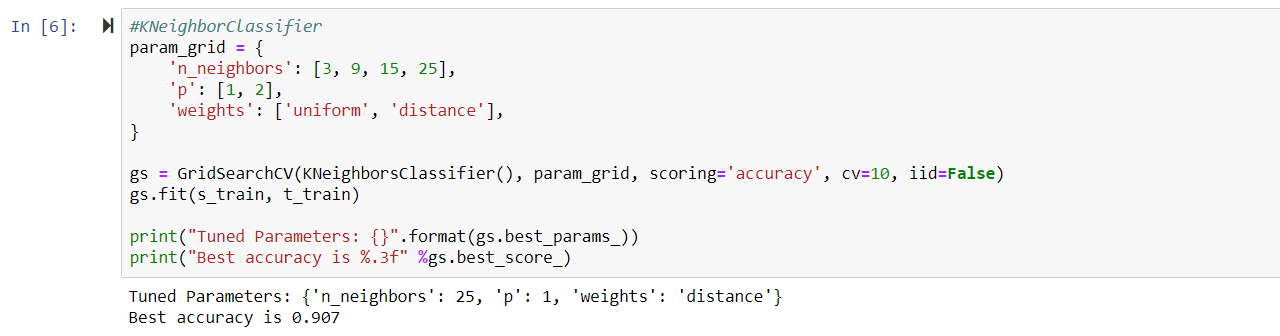

In [36]:
knn = KNeighborsClassifier(n_neighbors = 25, p = 1, weights = 'distance')
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print('accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

accuracy 0.901
              precision    recall  f1-score   support

           A       0.86      0.84      0.85       534
           D       0.92      0.90      0.91      1162
           G       1.00      1.00      1.00       397
           M       0.87      0.90      0.89      1537

    accuracy                           0.90      3630
   macro avg       0.91      0.91      0.91      3630
weighted avg       0.90      0.90      0.90      3630

[[ 446    0    0   88]
 [   0 1050    0  112]
 [   0    0  397    0]
 [  72   86    0 1379]]


### Undefined Player Data

In [37]:
predictions = knn.predict(UP)
print('accuracy %.3f' % metrics.accuracy_score(UP2, predictions))
print(metrics.classification_report(UP2, predictions))
print(metrics.confusion_matrix(UP2, predictions))

accuracy 0.750
              precision    recall  f1-score   support

           A       1.00      0.50      0.67         4
           D       0.80      1.00      0.89         4
           G       1.00      1.00      1.00         1
           M       0.50      0.67      0.57         3

    accuracy                           0.75        12
   macro avg       0.82      0.79      0.78        12
weighted avg       0.81      0.75      0.74        12

[[2 0 0 2]
 [0 4 0 0]
 [0 0 1 0]
 [0 1 0 2]]


### Position

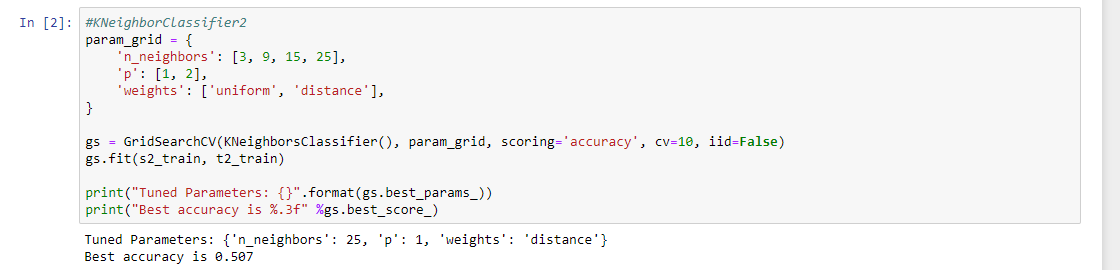

In [38]:
knn = KNeighborsClassifier(n_neighbors = 25, p = 1, weights = 'distance')
knn.fit(X_train2, y_train2)
predictions = knn.predict(X_test2)
print('accuracy %.3f' % metrics.accuracy_score(y_test2, predictions))
print(metrics.classification_report(y_test2, predictions))

accuracy 0.512
              precision    recall  f1-score   support

         CAM       0.44      0.42      0.43       195
          CB       0.56      0.78      0.65       368
         CDM       0.39      0.50      0.44       197
          CF       0.00      0.00      0.00        14
          CM       0.40      0.76      0.52       289
          GK       1.00      1.00      1.00       397
         LAM       0.00      0.00      0.00         7
          LB       0.42      0.50      0.46       248
         LCB       0.20      0.06      0.09       134
         LCM       0.00      0.00      0.00        87
         LDM       0.00      0.00      0.00        50
          LF       0.00      0.00      0.00         6
          LM       0.27      0.22      0.25       211
          LS       0.00      0.00      0.00        52
          LW       0.14      0.03      0.05        73
         LWB       0.00      0.00      0.00        15
         RAM       0.00      0.00      0.00         2
          RB